## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from itertools import combinations
%matplotlib inline

# Exploratory

In [2]:
data_df = pd.read_csv('data/kc_house_data.csv')

In [3]:
data_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Deal with nulls and convert to numeric

Issues -
nulls - waterfront, view, yr_renovated
date - wrong datatype
sqft_basement - why is it object?
zipcode probably shouldbe string



In [ ]:
#waterfornt values

In [4]:
data_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [5]:
p_waterfront = 146/(19075+146)
p_waterfront 

0.007595858696217679

In [6]:
likely_wrong = p_waterfront * (21597-19221)
likely_wrong

18.047760262213206

In [36]:
# dont want to use median or mean as it is a binary column,
# filling in the nans randomly using probability observed in the recorded data
# gives us no advantage over just using 0 given as there its far more likely
# that a 1 one erroneously fall on a 0 rather than correctly on a 1. 
# Only around 18 false values likley, so not going to skew values too much

In [7]:
data_df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
# replace with 0 as that is the dummy value for places that haven't been done up
# possibly worth making into a new feature of renovted v not renovated, and then 
# testing relantionship between year renovated and price

In [121]:
data_df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [ ]:
#assume the nans are no views

In [8]:
data_df = data_df.fillna({'waterfront' : 0, 'view' : 0, 'yr_renovated': 0,  'view' : 0})
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [9]:
data_df["date"] = pd.to_datetime(data_df["date"])
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [12]:
data_df['year_sold'] = data_df['date'].dt.year
data_df['month_sold'] = data_df['date'].dt.month
data_df['date_sold'] = data_df['date'].dt.day
data_df.drop('date', axis=1, inplace=True)
data_df

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   263000018  360000.0         3       2.50         1530      1131   
21593  6600060120  400000.0         4       2.50         2310      5813   
21594  1523300141  402101.0         2       0.75         1020      1350   
21595   291310100  400000.0         3       2.50         1600      2388   
21596  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
0         1.0         0.1   0.0          3  ...      1955           0.0   
1         2.0         0.0   0.0          3  ...      1951        1991.0   
2         1.0         0.0   0.0          3  ...      1933           0.1   
3         1.0         0.0   0.0          5  ...      1965           0.0   
4         1.0         0.0   0.0          3  ...      1987           0.0   
...       ...         ...   ...        ...  ...       ...           ...   
21592     3.0         0.0   0.0          3  ...      2009           0.0   
21593     2.0         0.0   0.0          3  ...      2014           0.0   
21594     2.0         0.0   0.0          3  ...      2009           0.0   
21595     2.0         0.1   0.0          3  ...      2004           0.0   
21596     2.0         0.0   0.0          3  ...      2008           0.0   

      zipcode      lat     long  sqft_living15  sqft_lot15  year_sold  \
0       98178  47.5112 -122.257           1340        5650       2014   
1       98125  47.7210 -122.319           1690        7639       2014   
2       98028  47.7379 -122.233           2720        8062       2015   
3       98136  47.5208 -122.393           1360        5000       2014   
4       98074  47.6168 -122.045           1800        7503       2015   
...       ...      ...      ...            ...         ...        ...   
21592   98103  47.6993 -122.346           1530        1509       2014   
21593   98146  47.5107 -122.362           1830        7200       2015   
21594   98144  47.5944 -122.299           1020        2007       2014   
21595   98027  47.5345 -122.069           1410        1287       2015   
21596   98144  47.5941 -122.299           1020        1357       2014   

       month_sold  date_sold  
0              10         13  
1              12          9  
2               2         25  
3              12          9  
4               2         18  
...           ...        ...  
21592           5         21  
21593           2         23  
21594           6         23  
21595           1         16  
21596          10         15  

[21597 rows x 23 columns]

In [7]:
data_df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2190.0        1
652.0         1
2050.0        1
1798.0        1
207.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [14]:
#insert 0
data_df['sqft_basement'].replace(to_replace='?', value=0.0, inplace=True)
data_df['sqft_basement'] = data_df['sqft_basement'].astype(float)
data_df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

# Split into test/train and create baseline model

In [55]:
y = data_df["price"]
X = data_df.drop("price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [56]:
x_int = sm.add_constant(X)
baseline = sm.OLS(y,x_int).fit()
baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2285.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:25:35   Log-Likelihood:            -2.9437e+05
No. Observations:               21595   AIC:                         5.888e+05
Df Residuals:                   21572   BIC:                         5.890e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.681e+07      1e+07     -6.677      0.000   -8.64e+07   -4.72e+07
id              -1.3e-06   4.83e-07     -2.690      0.007   -2.25e-06   -3.53e-07
bedrooms      -4.013e+04   1982.842    -20.238      0.000    -4.4e+04   -3.62e+04
bathrooms      4.291e+04   3270.457     13.121      0.000    3.65e+04    4.93e+04
sqft_living     107.6091     18.096      5.947      0.000      72.140     143.079
sqft_lot          0.0771      0.050      1.538      0.124      -0.021       0.175
floors         7444.3425   3604.989      2.065      0.039     378.297    1.45e+04
waterfront     5.272e+05    1.7e+04     31.035      0.000    4.94e+05     5.6e+05
view           5.629e+04   2111.979     26.654      0.000    5.22e+04    6.04e+04
condition      2.805e+04   2352.908     11.920      0.000    2.34e+04    3.27e+04
grade          9.669e+04   2165.095     44.657      0.000    9.24e+04    1.01e+05
sqft_above       76.7798     18.083      4.246      0.000      41.335     112.225
sqft_basement    45.5876     17.923      2.544      0.011      10.458      80.717
yr_built      -2651.5082     72.009    -36.822      0.000   -2792.652   -2510.365
yr_renovated     24.6993      3.982      6.202      0.000      16.894      32.505
zipcode        -594.5536     33.021    -18.005      0.000    -659.277    -529.830
lat            6.007e+05   1.08e+04     55.872      0.000     5.8e+05    6.22e+05
long          -2.174e+05   1.32e+04    -16.477      0.000   -2.43e+05   -1.92e+05
sqft_living15    20.6206      3.455      5.969      0.000      13.849      27.392
sqft_lot15       -0.3747      0.074     -5.053      0.000      -0.520      -0.229
year_sold      3.699e+04   4738.782      7.807      0.000    2.77e+04    4.63e+04
month_sold     1241.3911    711.305      1.745      0.081    -152.819    2635.601
date_sold      -346.2718    159.740     -2.168      0.030    -659.374     -33.170
==============================================================================
Omnibus:                    18407.891   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1849071.579
Skew:                           3.583   Prob(JB):                         0.00
Kurtosis:                      47.762   Cond. No.                     3.95e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model.score(X_train, y_train)


0.698757655612128

# Preparation

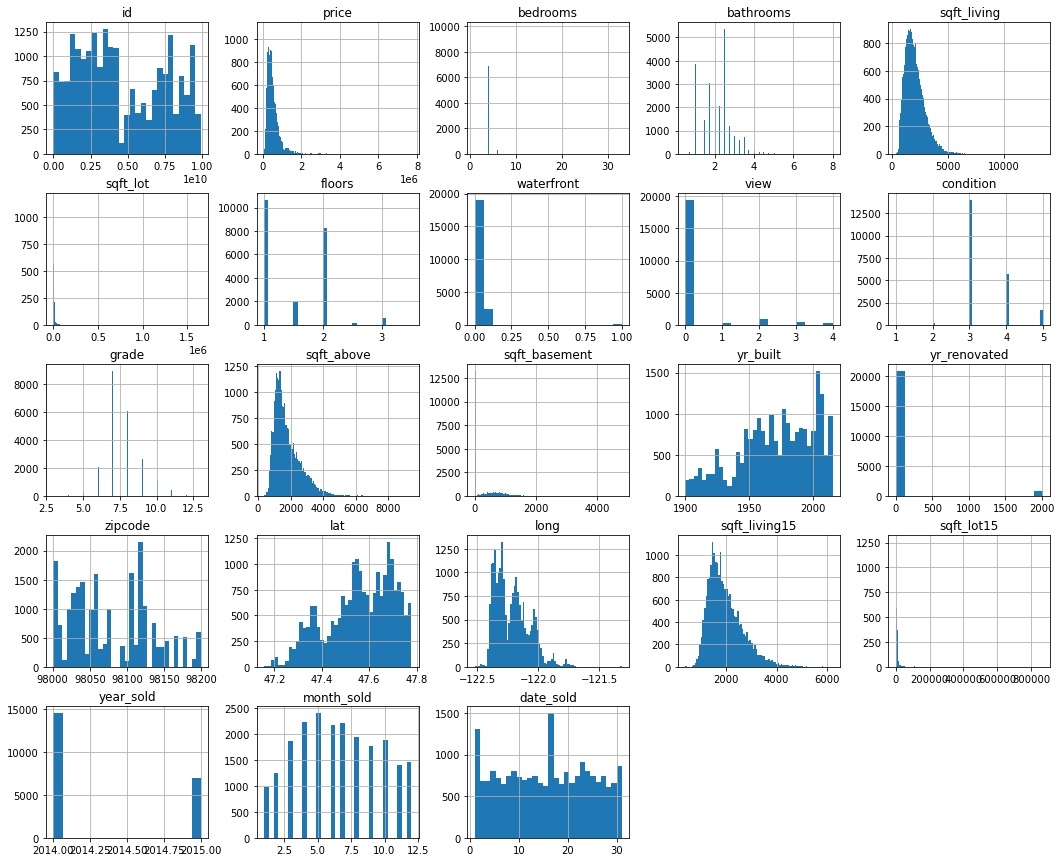

In [25]:
data_df.hist(figsize=(18,15), bins='auto');

In [51]:
data_df['bedrooms'].sort_values(ascending=False)


15856    33
8748     11
19239    10
15147    10
13301    10
         ..
12823     1
14340     1
14332     1
17380     1
9877      1
Name: bedrooms, Length: 21596, dtype: int64

In [53]:
data_df = data_df.drop(15856)
data_df['bedrooms'].sort_values(ascending=False)

8748     11
13301    10
15147    10
19239    10
4231      9
         ..
12823     1
14340     1
14332     1
17380     1
9877      1
Name: bedrooms, Length: 21595, dtype: int64

In [27]:
data_df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [30]:
pd.set_option('float_format', '{:f}'.format)

In [31]:
data_df['sqft_lot'].describe()

count     21597.000000
mean      15099.408760
std       41412.636876
min         520.000000
25%        5040.000000
50%        7618.000000
75%       10685.000000
max     1651359.000000
Name: sqft_lot, dtype: float64

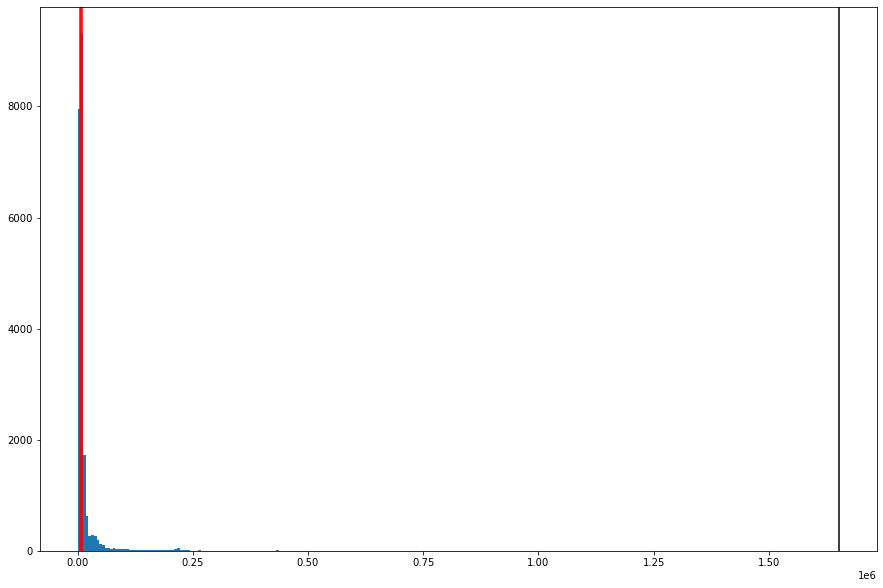

In [49]:
plt.figure(figsize=(15,10))
plt.axvline(x=5040, color='red')
plt.axvline(x=7618, color='red')
plt.axvline(x=10685, color='red')
plt.axvline(x=1651359, color='black')
plt.hist(data_df['sqft_lot'], bins =200);

In [45]:
data_df['sqft_lot'].sort_values(ascending=False).head(20)

1717     1651359
17305    1164794
7640     1074218
7762     1024068
3945      982998
4437      982278
6685      920423
7070      881654
9705      871200
20436     871200
4536      843309
12993     715690
13464     641203
16174     623779
7287      577605
17811     542322
17562     533610
12906     507038
2962      505166
20405     503989
Name: sqft_lot, dtype: int64

In [46]:
data_df = data_df.drop(1717)
data_df['sqft_lot'].sort_values(ascending=False).head(20)

17305    1164794
7640     1074218
7762     1024068
3945      982998
4437      982278
6685      920423
7070      881654
9705      871200
20436     871200
4536      843309
12993     715690
13464     641203
16174     623779
7287      577605
17811     542322
17562     533610
12906     507038
2962      505166
20405     503989
17335     501376
Name: sqft_lot, dtype: int64

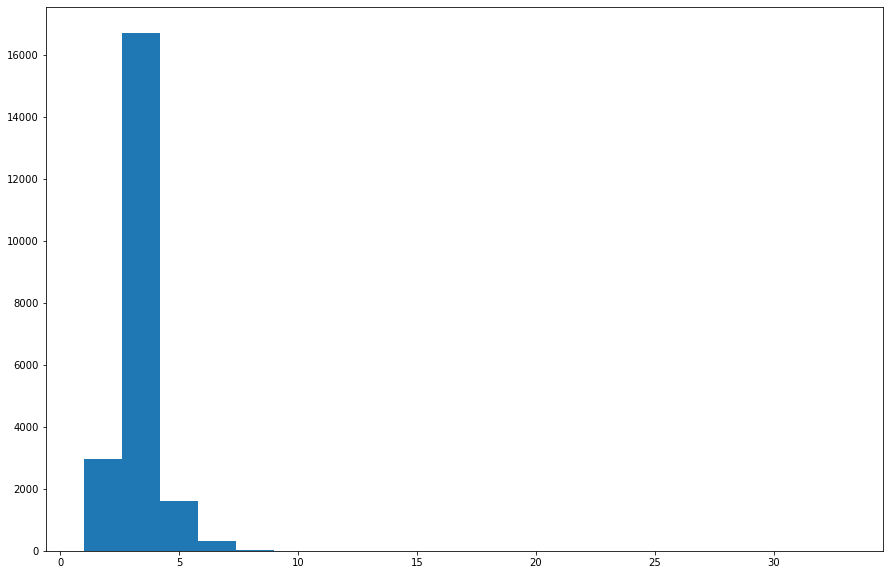

In [50]:
plt.figure(figsize=(15,10))
plt.hist(data_df['bedrooms'], bins =20);

In [13]:
#list high outliers in indie variables
high_lot = data_df[data_df['sqft_lot'] > 500000]
high_lot15 = data_df[data_df['sqft_lot15'] > 300000]
high_price = data_df[data_df['price'] > 4000000]
high_lot.describe()

id         price   bedrooms  bathrooms  sqft_living  \
count  2.100000e+01  2.100000e+01  21.000000  21.000000    21.000000   
mean   1.799022e+09  8.457095e+05   3.190476   2.607143  2871.142857   
std    1.004976e+09  4.398517e+05   1.077917   1.108409  1505.610816   
min    2.250790e+08  1.900000e+05   1.000000   1.000000   710.000000   
25%    8.220390e+08  5.500000e+05   2.000000   1.750000  1679.000000   
50%    1.923039e+09  7.900000e+05   3.000000   2.500000  2560.000000   
75%    2.623069e+09  9.375000e+05   4.000000   3.250000  3900.000000   
max    3.626079e+09  2.000000e+06   5.000000   5.500000  6530.000000   

           sqft_lot     floors  waterfront       view  condition      grade  \
count  2.100000e+01  21.000000   21.000000  21.000000  21.000000  21.000000   
mean   8.056800e+05   1.642857    0.066667   0.714286   3.476190   8.476190   
std    2.900225e+05   0.550973    0.217562   1.189237   0.749603   1.990453   
min    5.013760e+05   1.000000    0.000000   0.000000   2.000000   5.000000   
25%    5.423220e+05   1.000000    0.000000   0.000000   3.000000   7.000000   
50%    8.433090e+05   2.000000    0.000000   0.000000   3.000000   8.000000   
75%    9.822780e+05   2.000000    0.000000   2.000000   4.000000  10.000000   
max    1.651359e+06   3.000000    1.000000   3.000000   5.000000  12.000000   

        sqft_above  sqft_basement     yr_built  yr_renovated        lat  \
count    21.000000      21.000000    21.000000     21.000000  21.000000   
mean   2673.047619     198.095238  1977.190476      0.028571  47.453410   
std    1421.620747     499.395825    31.555695      0.046291   0.161034   
min     710.000000       0.000000  1915.000000      0.000000  47.162200   
25%    1679.000000       0.000000  1955.000000      0.000000  47.378200   
50%    2350.000000       0.000000  1990.000000      0.000000  47.456400   
75%    3770.000000       0.000000  2003.000000      0.100000  47.538500   
max    6530.000000    1940.000000  2009.000000      0.100000  47.695500   

             long  sqft_living15     sqft_lot15  
count   21.000000      21.000000      21.000000  
mean  -122.026286    2068.571429  228850.380952  
std      0.243621     528.708669  249531.300428  
min   -122.514000    1280.000000   11700.000000  
25%   -122.024000    1710.000000   60548.000000  
50%   -121.949000    2030.000000  112384.000000  
75%   -121.882000    2290.000000  325393.000000  
max   -121.744000    3420.000000  871200.000000

In [14]:
high_lot15.describe()

id         price   bedrooms  bathrooms  sqft_living  \
count  2.200000e+01  2.200000e+01  22.000000  22.000000    22.000000   
mean   1.602296e+09  6.647023e+05   3.227273   2.386364  2837.454545   
std    1.099165e+09  4.262460e+05   0.972567   1.125271  1447.816146   
min    1.200691e+08  1.800000e+05   2.000000   1.000000   960.000000   
25%    6.200716e+08  3.850000e+05   3.000000   1.750000  1712.500000   
50%    1.486015e+09  5.750000e+05   3.000000   2.500000  2525.000000   
75%    2.524337e+09  7.800000e+05   4.000000   3.062500  3425.000000   
max    3.623029e+09  2.000000e+06   6.000000   5.500000  6530.000000   

           sqft_lot     floors  waterfront       view  condition      grade  \
count  2.200000e+01  22.000000   22.000000  22.000000  22.000000  22.000000   
mean   4.062393e+05   1.568182    0.004545   0.681818   3.363636   8.181818   
std    3.954938e+05   0.495106    0.021320   1.170525   0.581087   1.867934   
min    3.225000e+04   1.000000    0.000000   0.000000   2.000000   5.000000   
25%    1.091170e+05   1.000000    0.000000   0.000000   3.000000   7.000000   
50%    2.585285e+05   1.500000    0.000000   0.000000   3.000000   8.000000   
75%    5.412128e+05   2.000000    0.000000   1.500000   4.000000   9.000000   
max    1.651359e+06   2.500000    0.100000   3.000000   4.000000  12.000000   

        sqft_above  sqft_basement     yr_built  yr_renovated        lat  \
count    22.000000      22.000000    22.000000     22.000000  22.000000   
mean   2542.909091     272.272727  1974.363636     90.427273  47.430986   
std    1348.056093     590.487545    30.915469    424.052166   0.215418   
min     960.000000       0.000000  1912.000000      0.000000  47.162200   
25%    1649.750000       0.000000  1947.000000      0.000000  47.237025   
50%    2395.000000       0.000000  1979.000000      0.000000  47.420700   
75%    3040.000000       0.000000  2001.750000      0.000000  47.629625   
max    6530.000000    1940.000000  2009.000000   1989.000000  47.772100   

             long  sqft_living15     sqft_lot15  
count   22.000000      22.000000      22.000000  
mean  -122.020227    2091.363636  422185.954545  
std      0.202489     644.096232  154516.076916  
min   -122.506000    1010.000000  310582.000000  
25%   -122.027500    1590.000000  328395.000000  
50%   -121.970500    1940.000000  383545.500000  
75%   -121.904500    2540.000000  424927.500000  
max   -121.756000    3420.000000  871200.000000

In [15]:
high_lot_ids = high_lot['id'].tolist()
high_lot15_ids = high_lot15['id'].tolist()
high_price_ids = high_price['id'].tolist()

In [16]:
id_list = []
id_list.extend(high_lot_ids)
id_list.extend(high_lot15_ids) 
id_list.extend(high_price_ids) 

In [17]:
no_outliers = data_df[~data_df.id.isin(id_list)]

In [18]:
zeros_list = ['waterfront', 'view', 'sqft_basement', 'yr_renovated']
for z in zeros_list:
    no_outliers[z].replace(to_replace=0, value=0.1, inplace=True)
no_outliers.head()

C:\Users\james\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         0.1   0.1  ...      7        1180            0.1   
1      7242     2.0         0.1   0.1  ...      7        2170          400.0   
2     10000     1.0         0.1   0.1  ...      6         770            0.1   
3      5000     1.0         0.1   0.1  ...      7        1050          910.0   
4      8080     1.0         0.1   0.1  ...      8        1680            0.1   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.1        0  47.5112 -122.257           1340   
1      1951        1991.0      400  47.7210 -122.319           1690   
2      1933           0.1        0  47.7379 -122.233           2720   
3      1965           0.1      910  47.5208 -122.393           1360   
4      1987           0.1        0  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [19]:
no_outliers.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         0.1   0.1  ...      7        1180            0.1   
1      7242     2.0         0.1   0.1  ...      7        2170          400.0   
2     10000     1.0         0.1   0.1  ...      6         770            0.1   
3      5000     1.0         0.1   0.1  ...      7        1050          910.0   
4      8080     1.0         0.1   0.1  ...      8        1680            0.1   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.1        0  47.5112 -122.257           1340   
1      1951        1991.0      400  47.7210 -122.319           1690   
2      1933           0.1        0  47.7379 -122.233           2720   
3      1965           0.1      910  47.5208 -122.393           1360   
4      1987           0.1        0  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [20]:
no_outliers['year_sold'] = no_outliers['date'].dt.year
no_outliers['year_sold'].head()

<ipython-input-20-723ae2da9162>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers['year_sold'] = no_outliers['date'].dt.year


0    2014
1    2014
2    2015
3    2014
4    2015
Name: year_sold, dtype: int64

In [21]:
no_outliers.drop(labels='date', axis=1, inplace=True)
no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21549 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21549 non-null  int64  
 1   price          21549 non-null  float64
 2   bedrooms       21549 non-null  int64  
 3   bathrooms      21549 non-null  float64
 4   sqft_living    21549 non-null  int64  
 5   sqft_lot       21549 non-null  int64  
 6   floors         21549 non-null  float64
 7   waterfront     21549 non-null  float64
 8   view           21549 non-null  float64
 9   condition      21549 non-null  int64  
 10  grade          21549 non-null  int64  
 11  sqft_above     21549 non-null  int64  
 12  sqft_basement  21549 non-null  float64
 13  yr_built       21549 non-null  int64  
 14  yr_renovated   21549 non-null  float64
 15  zipcode        21549 non-null  object 
 16  lat            21549 non-null  float64
 17  long           21549 non-null  float64
 18  sqft_l

C:\Users\james\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
no_outliers.drop(labels='zipcode', axis=1, inplace=True)

# Preprocessing


In [23]:
cont_df = np.log(abs(no_outliers))
cont_df

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      22.687479  12.309982  1.098612   0.000000     7.073270  8.639411   
1      22.581765  13.195614  1.098612   0.810930     7.851661  8.887653   
2      22.451642  12.100712  0.693147   0.000000     6.646391  9.210340   
3      21.634424  13.311329  1.386294   1.098612     7.580700  8.517193   
4      21.393349  13.142166  1.098612   0.693147     7.426549  8.997147   
...          ...        ...       ...        ...          ...       ...   
21592  19.387665  12.793859  1.098612   0.916291     7.333023  7.030857   
21593  22.610345  12.899220  1.386294   0.916291     7.745003  8.667852   
21594  21.144145  12.904459  0.693147  -0.287682     6.927558  7.207860   
21595  19.489899  12.899220  1.098612   0.916291     7.377759  7.778211   
21596  21.144145  12.691580  0.693147  -0.287682     6.927558  6.981006   

         floors  waterfront      view  condition     grade  sqft_above  \
0      0.000000   -2.302585 -2.302585   1.098612  1.945910    7.073270   
1      0.693147   -2.302585 -2.302585   1.098612  1.945910    7.682482   
2      0.000000   -2.302585 -2.302585   1.098612  1.791759    6.646391   
3      0.000000   -2.302585 -2.302585   1.609438  1.945910    6.956545   
4      0.000000   -2.302585 -2.302585   1.098612  2.079442    7.426549   
...         ...         ...       ...        ...       ...         ...   
21592  1.098612   -2.302585 -2.302585   1.098612  2.079442    7.333023   
21593  0.693147   -2.302585 -2.302585   1.098612  2.079442    7.745003   
21594  0.693147   -2.302585 -2.302585   1.098612  1.945910    6.927558   
21595  0.693147   -2.302585 -2.302585   1.098612  2.079442    7.377759   
21596  0.693147   -2.302585 -2.302585   1.098612  1.945910    6.927558   

       sqft_basement  yr_built  yr_renovated       lat      long  \
0          -2.302585  7.578145     -2.302585  3.860965  4.806125   
1           5.991465  7.576097      7.596392  3.865372  4.806632   
2          -2.302585  7.566828     -2.302585  3.865726  4.805929   
3           6.813445  7.583248     -2.302585  3.861168  4.807237   
4          -2.302585  7.594381     -2.302585  3.863186  4.804390   
...              ...       ...           ...       ...       ...   
21592      -2.302585  7.605392     -2.302585  3.864917  4.806853   
21593      -2.302585  7.607878     -2.302585  3.860955  4.806984   
21594      -2.302585  7.605392     -2.302585  3.862715  4.806469   
21595      -2.302585  7.602900     -2.302585  3.861456  4.804586   
21596      -2.302585  7.604894     -2.302585  3.862709  4.806469   

       sqft_living15  sqft_lot15  year_sold  
0           7.200425    8.639411   7.607878  
1           7.432484    8.941022   7.607878  
2           7.908387    8.994917   7.608374  
3           7.215240    8.517193   7.607878  
4           7.495542    8.923058   7.608374  
...              ...         ...        ...  
21592       7.333023    7.319202   7.607878  
21593       7.512071    8.881836   7.608374  
21594       6.927558    7.604396   7.607878  
21595       7.251345    7.160069   7.608374  
21596       6.927558    7.213032   7.607878  

[21549 rows x 20 columns]

In [24]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
preprocessed = cont_df.apply(normalize)

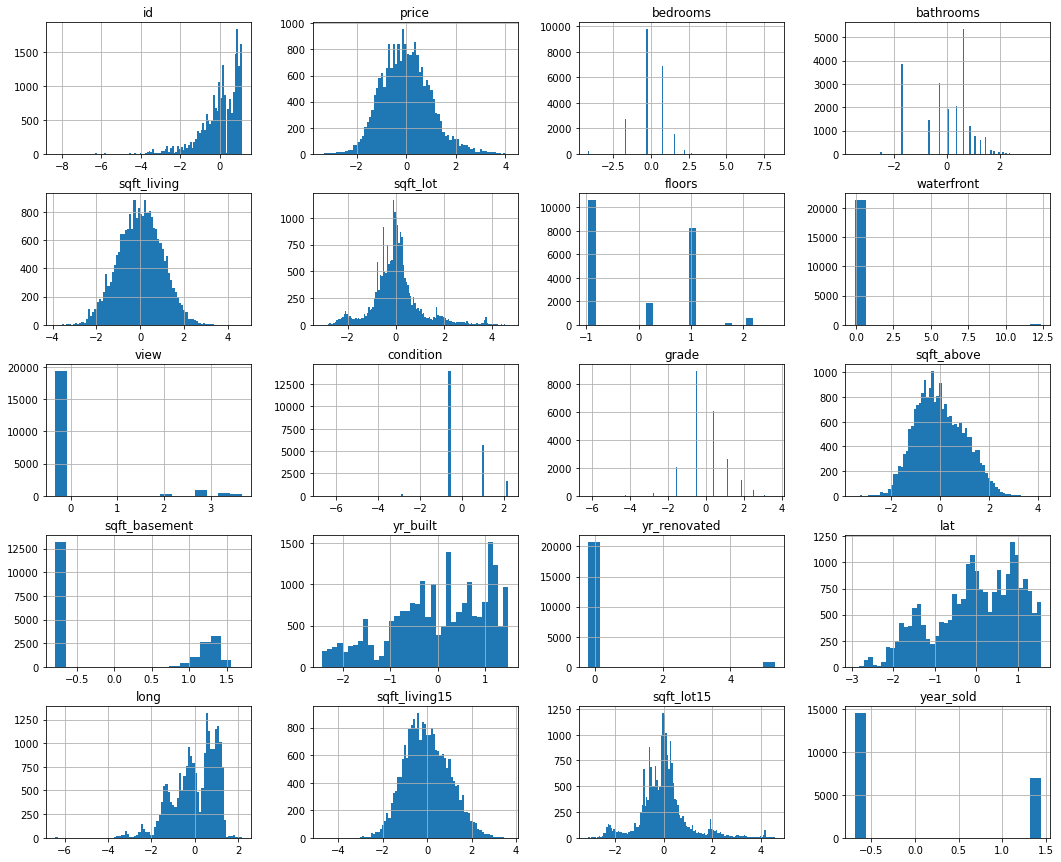

In [94]:
preprocessed.hist(figsize=(18,15), bins='auto');


In [68]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21549 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21549 non-null  float64
 1   price          21549 non-null  float64
 2   bedrooms       21549 non-null  float64
 3   bathrooms      21549 non-null  float64
 4   sqft_living    21549 non-null  float64
 5   sqft_lot       21549 non-null  float64
 6   floors         21549 non-null  float64
 7   waterfront     0 non-null      float64
 8   view           0 non-null      float64
 9   condition      21549 non-null  float64
 10  grade          21549 non-null  float64
 11  sqft_above     21549 non-null  float64
 12  sqft_basement  21549 non-null  float64
 13  yr_built       21549 non-null  float64
 14  yr_renovated   0 non-null      float64
 15  lat            21549 non-null  float64
 16  long           21549 non-null  float64
 17  sqft_living15  21549 non-null  float64
 18  sqft_l

# Split into target/features and test train

In [25]:
y = preprocessed[['price']]
X = preprocessed.drop(["price", 'id'], axis=1)

# Baseline model

In [26]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline

0.7664450142373807

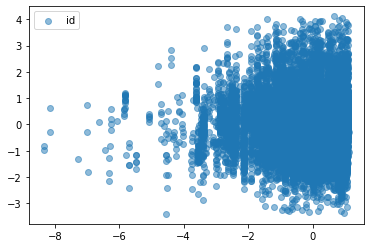

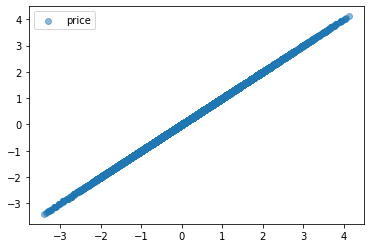

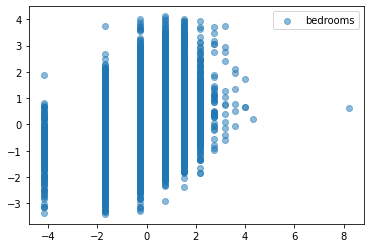

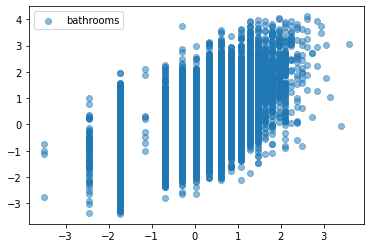

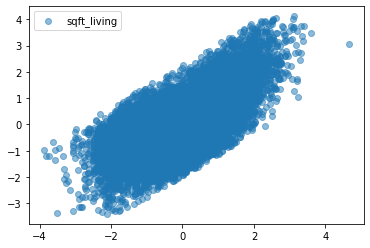

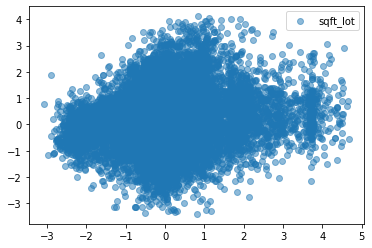

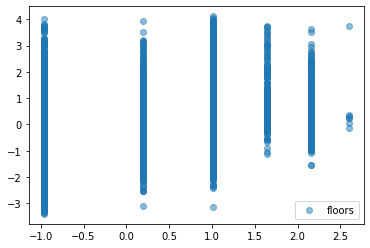

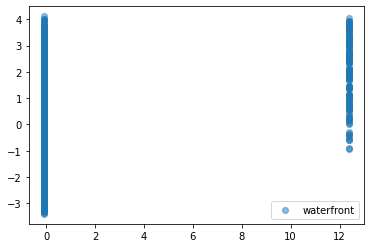

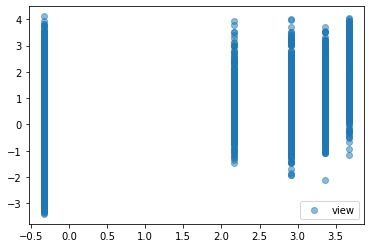

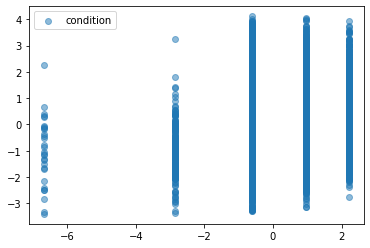

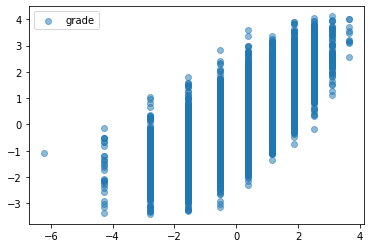

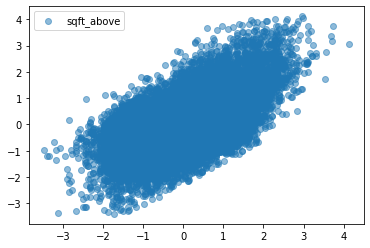

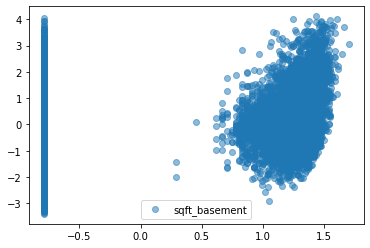

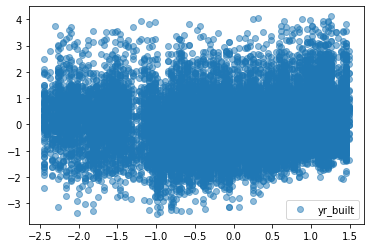

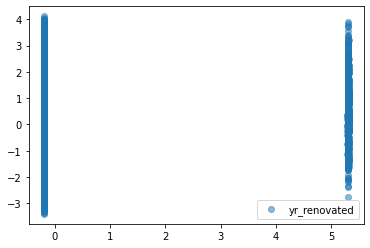

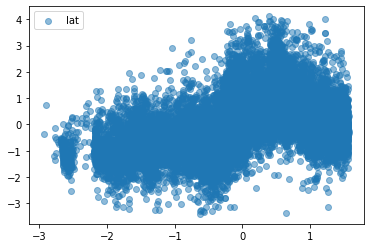

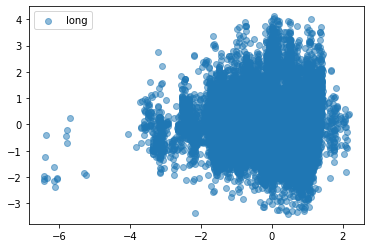

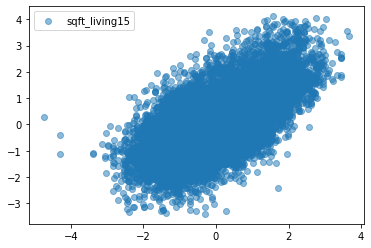

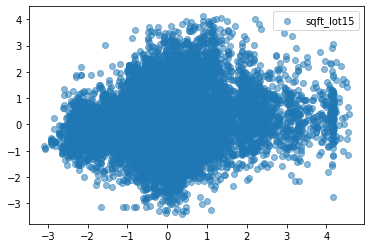

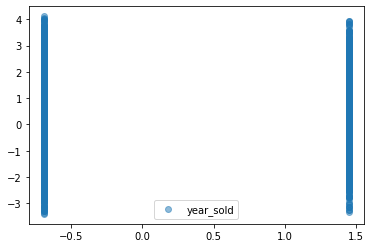

In [97]:
for col in preprocessed:
    plt.scatter(preprocessed[col], preprocessed['price'], label = col, alpha=0.5)
    plt.legend()
    plt.show()

id normality tests
['id', 2.840206587906291e-05, -3.00454106039183e-15, -0.005329358861926041, 0.4340456047623299, 794.8087272490781]


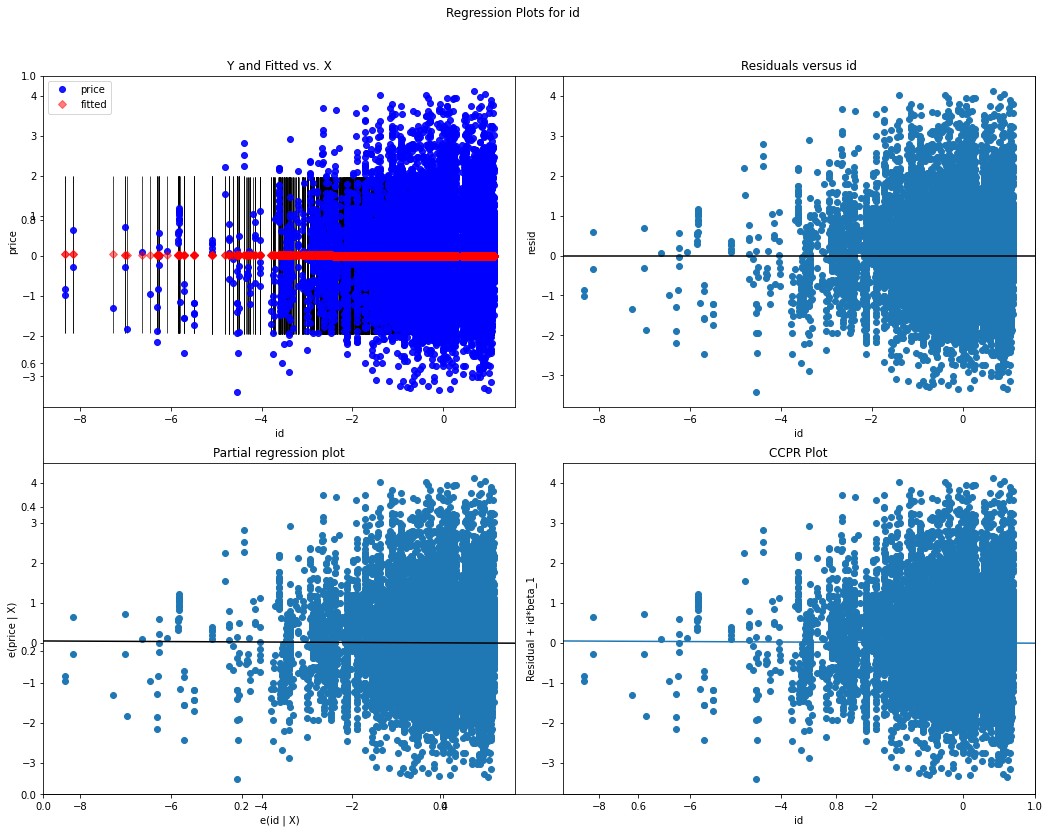

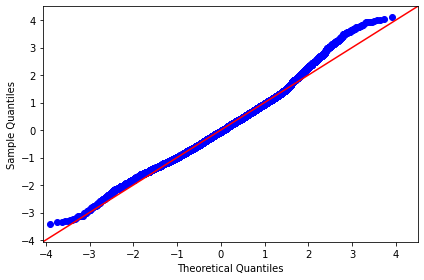

price normality tests
['price', 1.0, -3.00454106039183e-15, 1.0, 0.0, 2740.3042660236724]


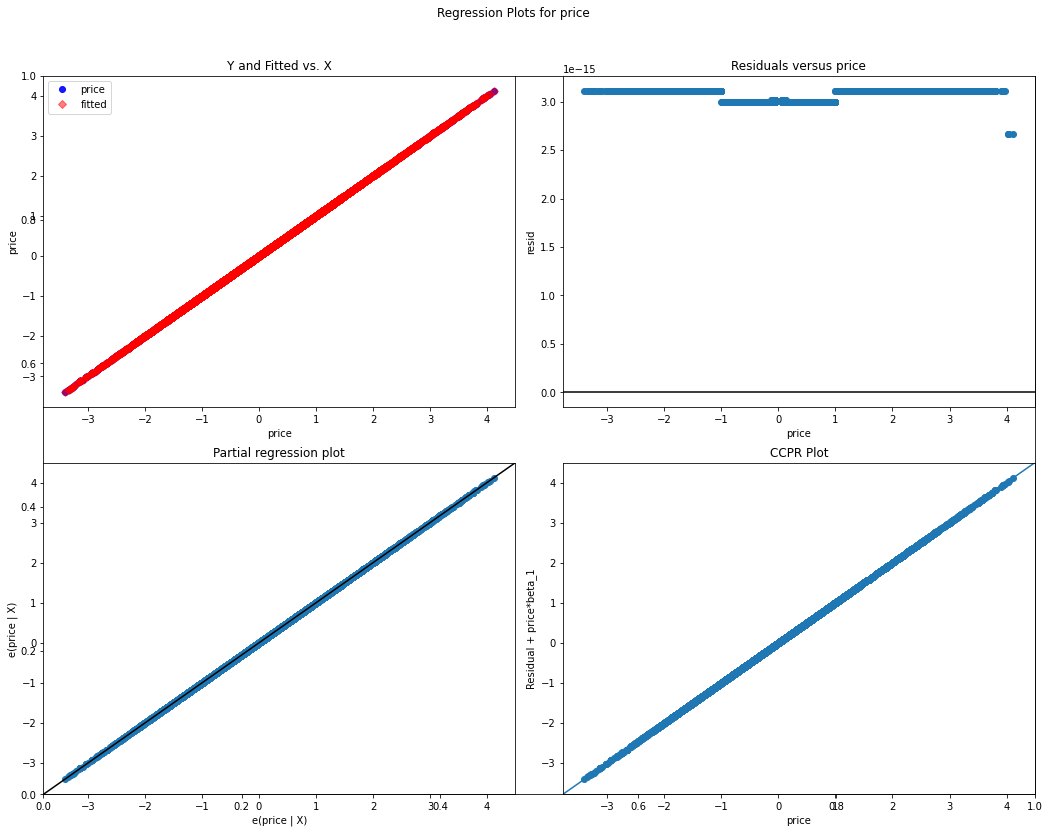

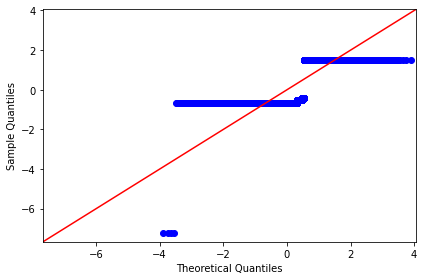

bedrooms normality tests
['bedrooms', 0.11662507152793389, -3.00454106039183e-15, 0.34150413105544153, 0.0, 512.1583857574918]


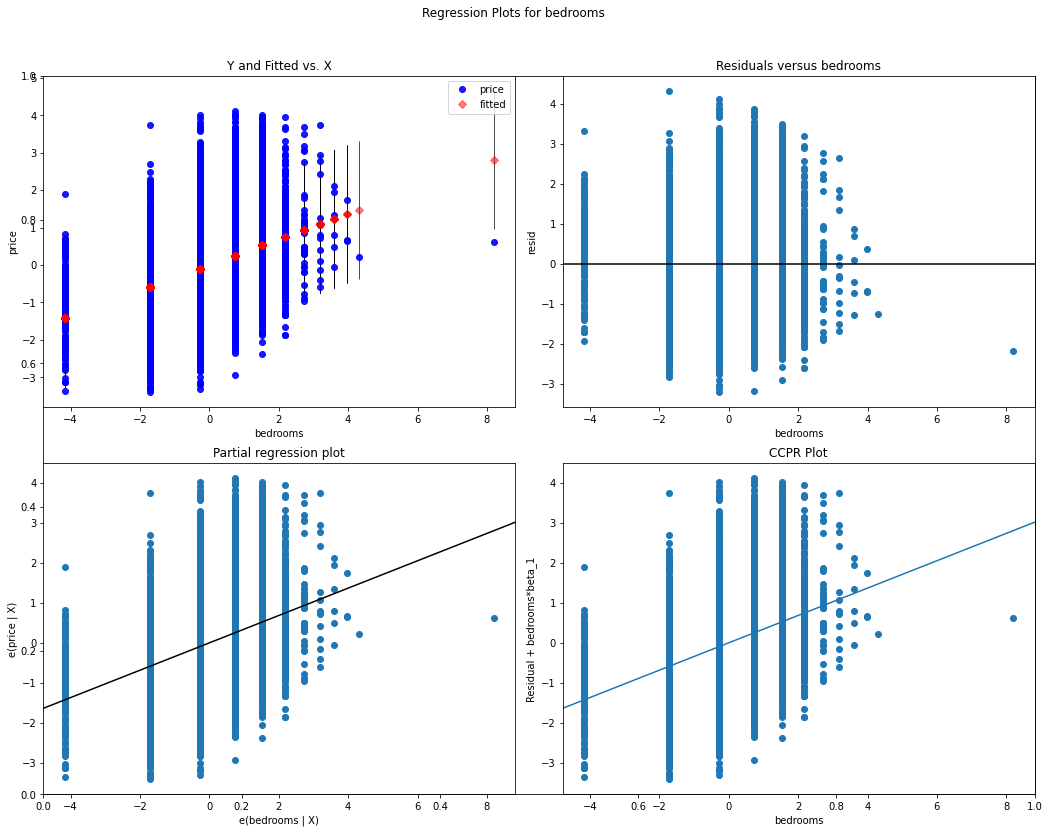

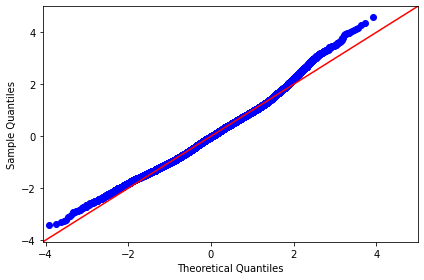

bathrooms normality tests
['bathrooms', 0.26760230155336284, -3.00454106039183e-15, 0.5173029108301668, 0.0, 293.8943920426216]


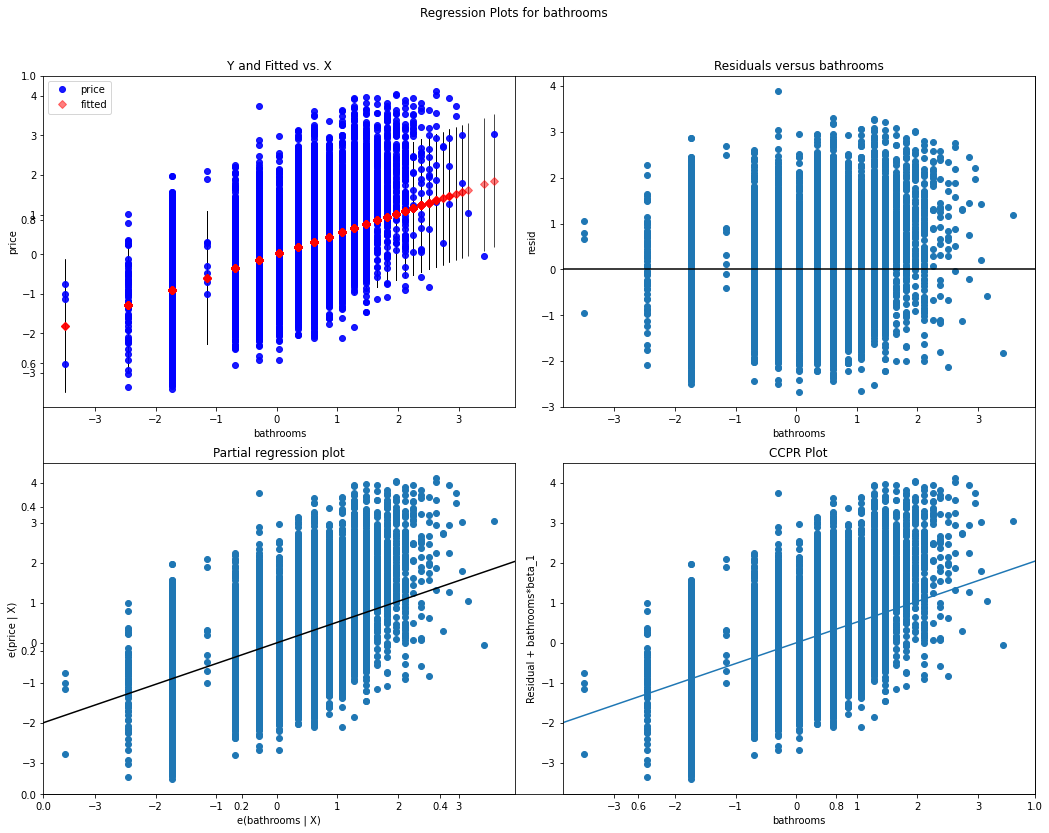

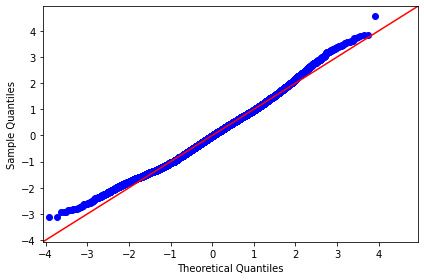

sqft_living normality tests
['sqft_living', 0.45154419086398756, -3.00454106039183e-15, 0.6719703794543239, 0.0, 111.91894981955326]


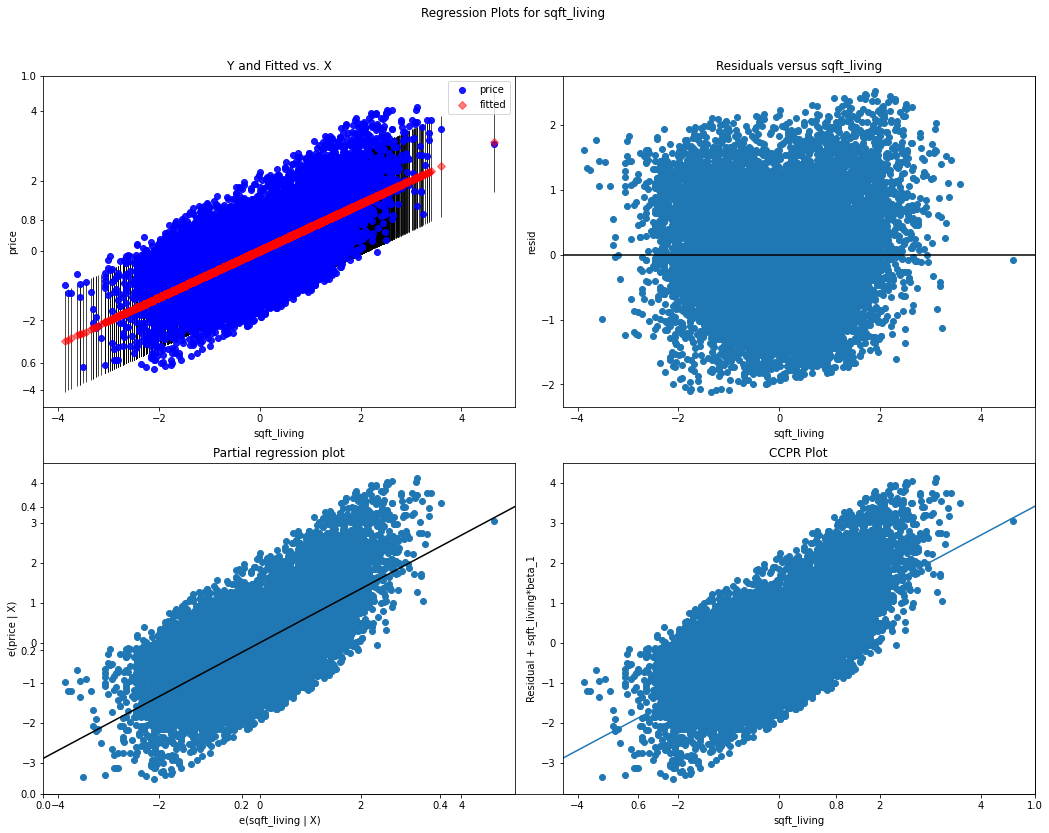

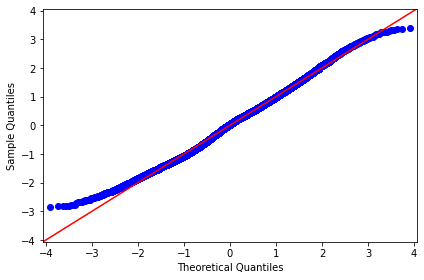

sqft_lot normality tests
['sqft_lot', 0.017812885813982104, -3.00454106039183e-15, 0.13346492353417047, 3.260842194113346e-86, 546.6267829759765]


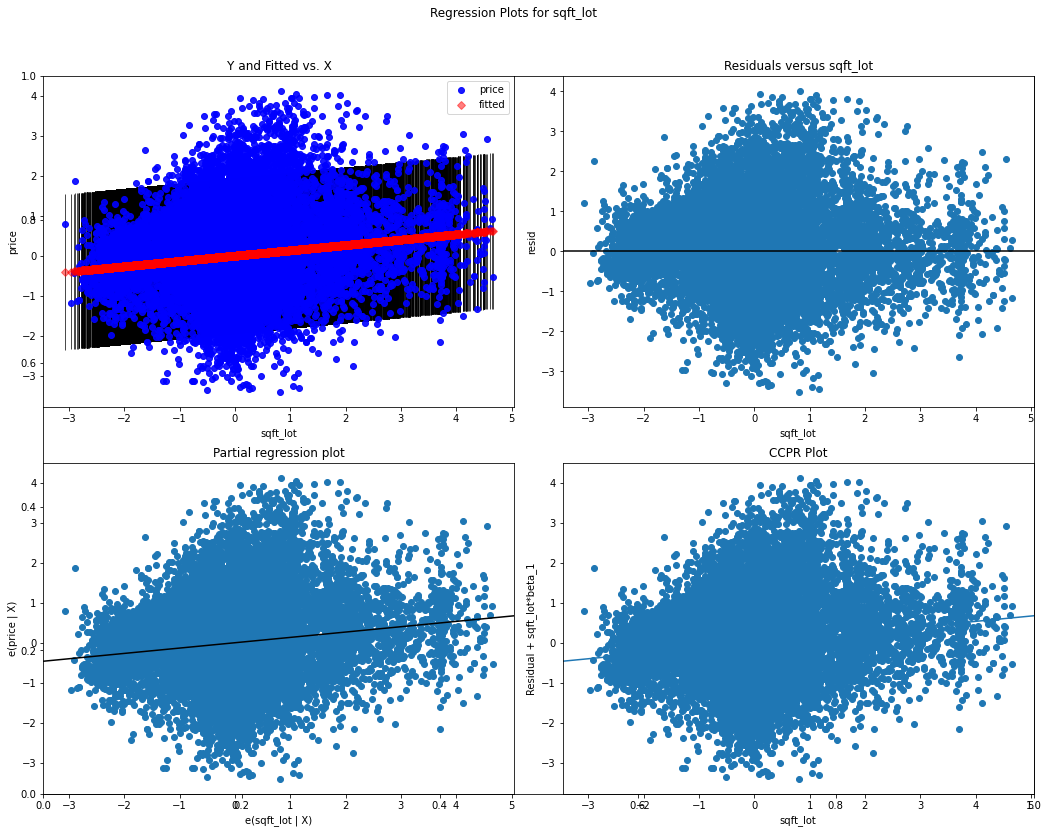

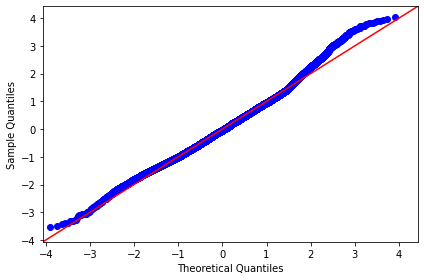

floors normality tests
['floors', 0.10392449968282746, -3.00454106039183e-15, 0.32237323040666366, 0.0, 787.8238746369583]


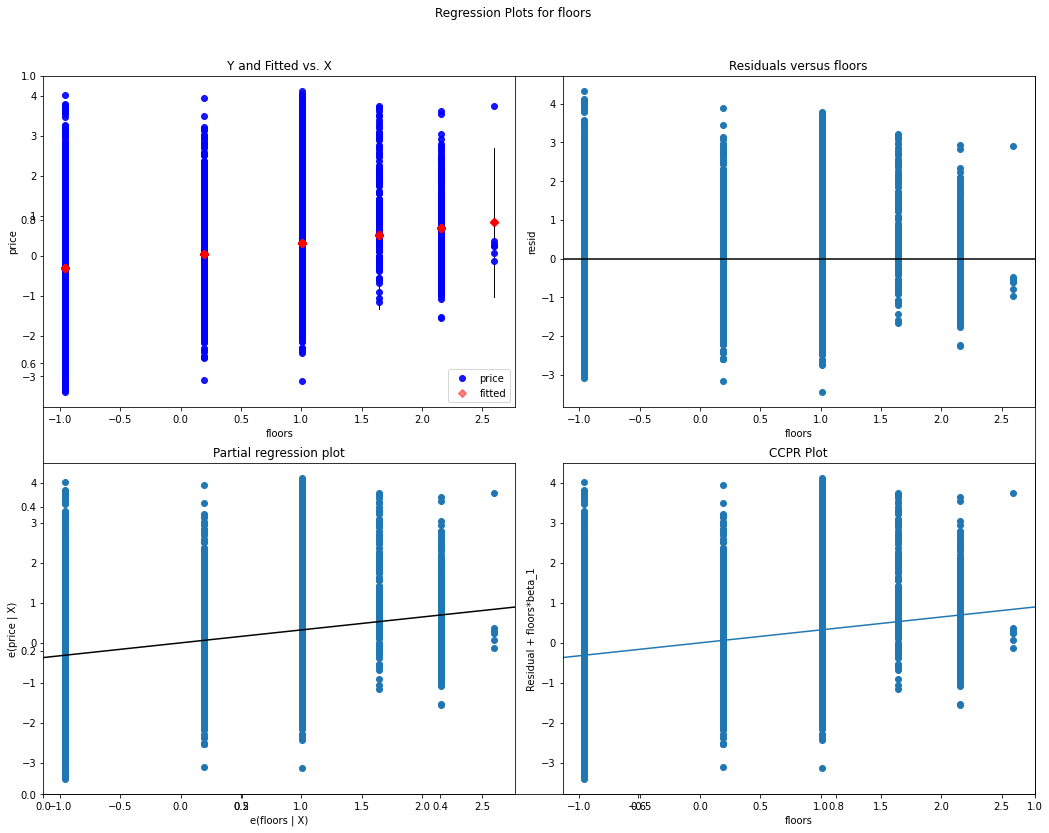

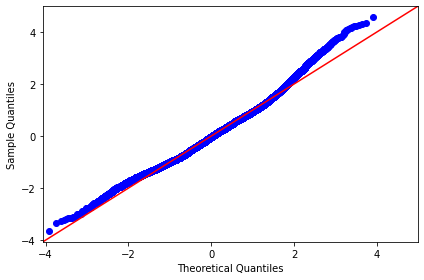

waterfront normality tests
['waterfront', 0.02609111161701494, -3.00454106039183e-15, 0.16152743301685382, 6.737030473593488e-126, 546.5383729280343]


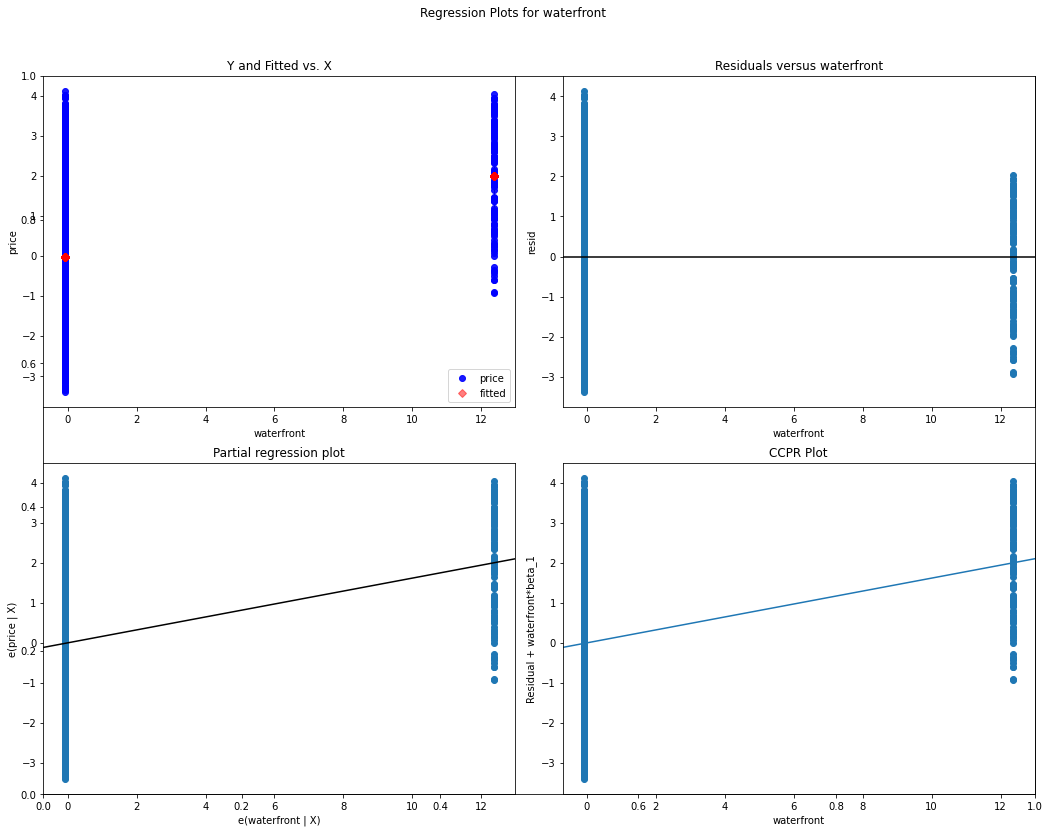

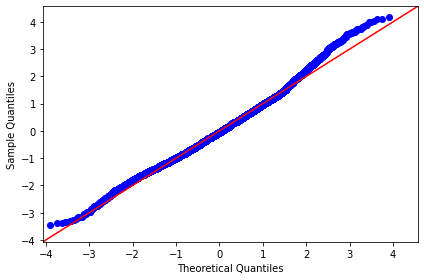

view normality tests
['view', 0.11286622721041295, -3.00454106039183e-15, 0.3359556923322095, 0.0, 306.5873488516771]


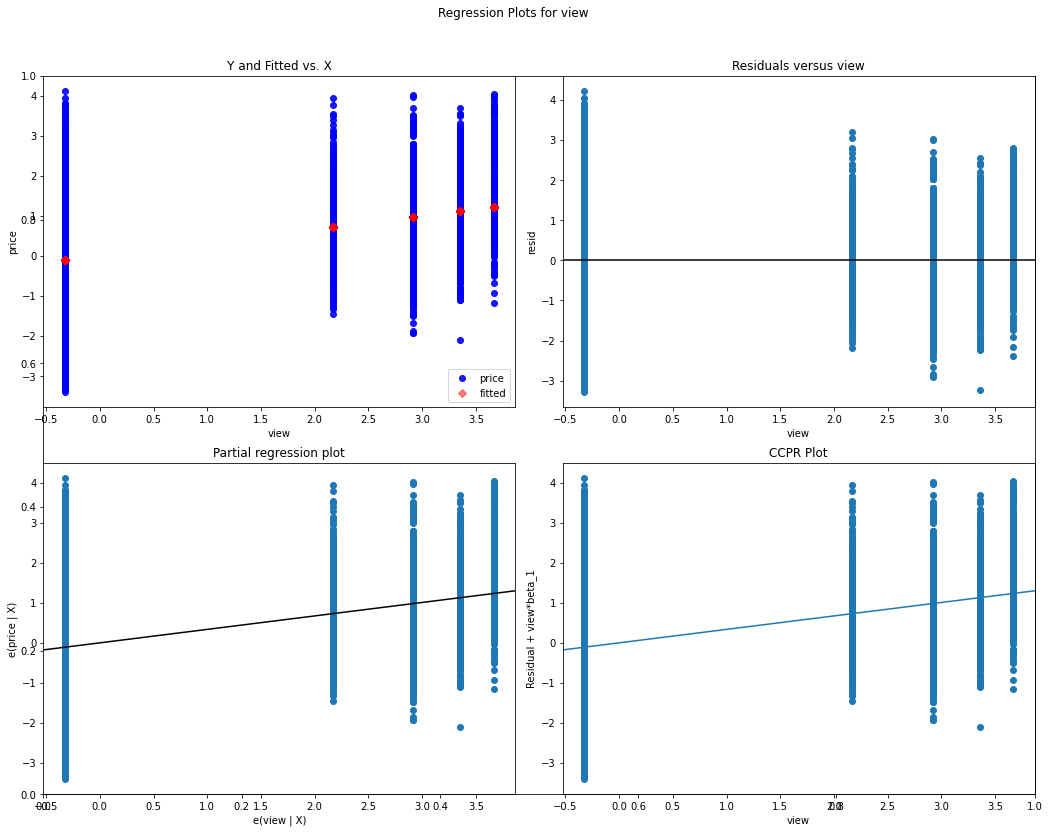

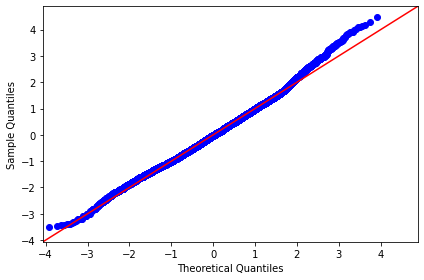

condition normality tests
['condition', 0.001972288550593837, -3.00454106039183e-15, 0.044410455419796435, 6.93265990765091e-11, 785.7890748672197]


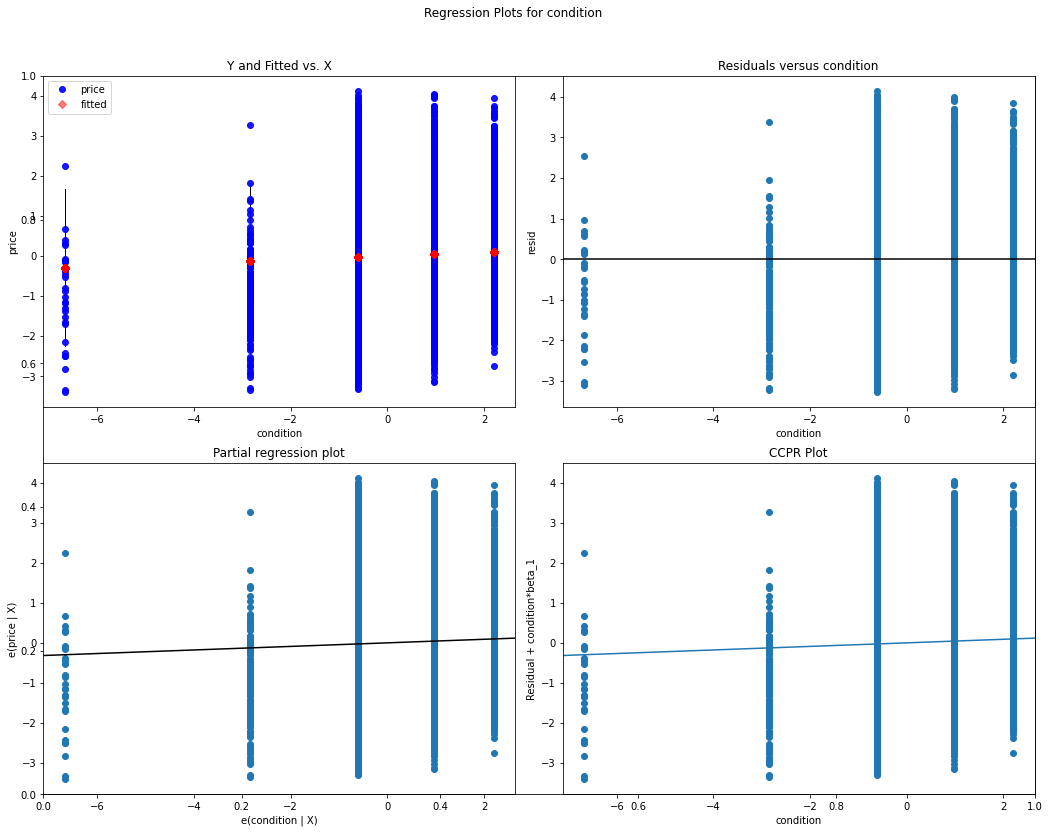

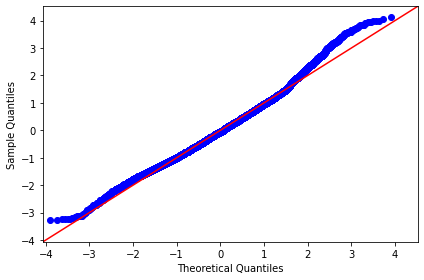

grade normality tests
['grade', 0.4782572067851023, -3.00454106039183e-15, 0.691561426617407, 0.0, 177.0272133431087]


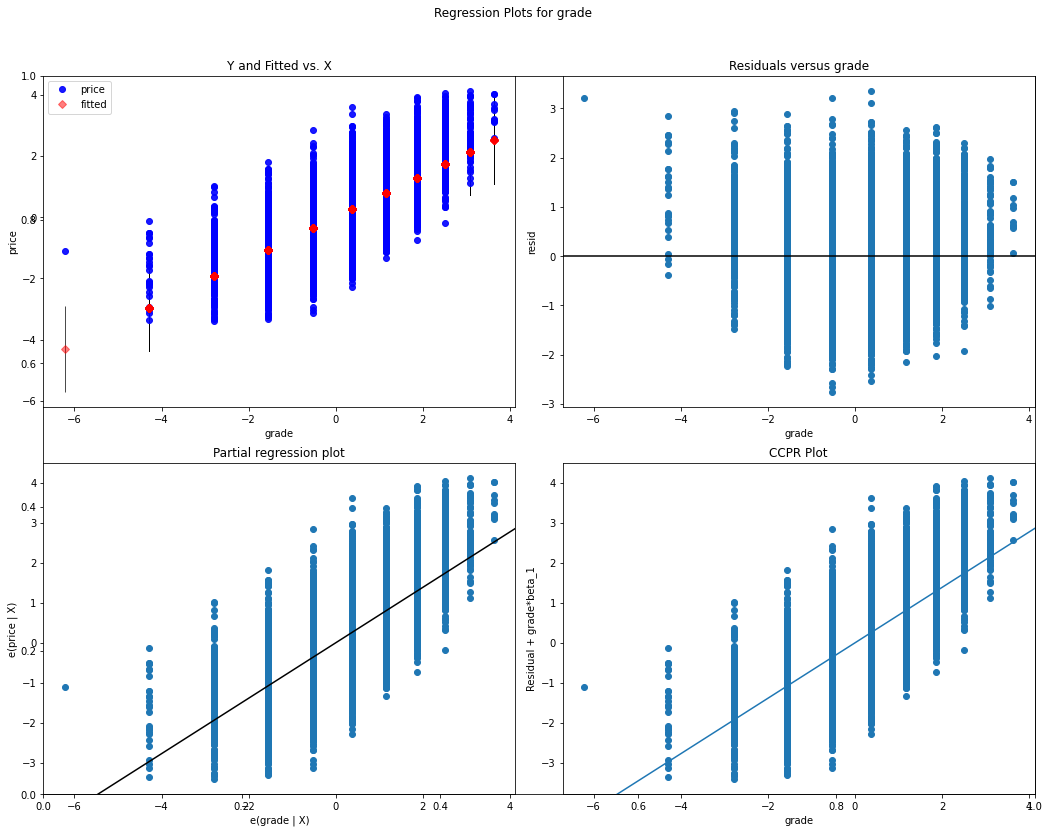

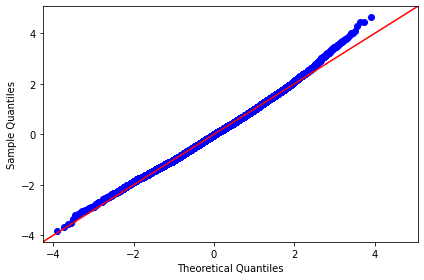

sqft_above normality tests
['sqft_above', 0.33934444165203903, -3.00454106039183e-15, 0.5825327816115063, 0.0, 130.36871545370448]


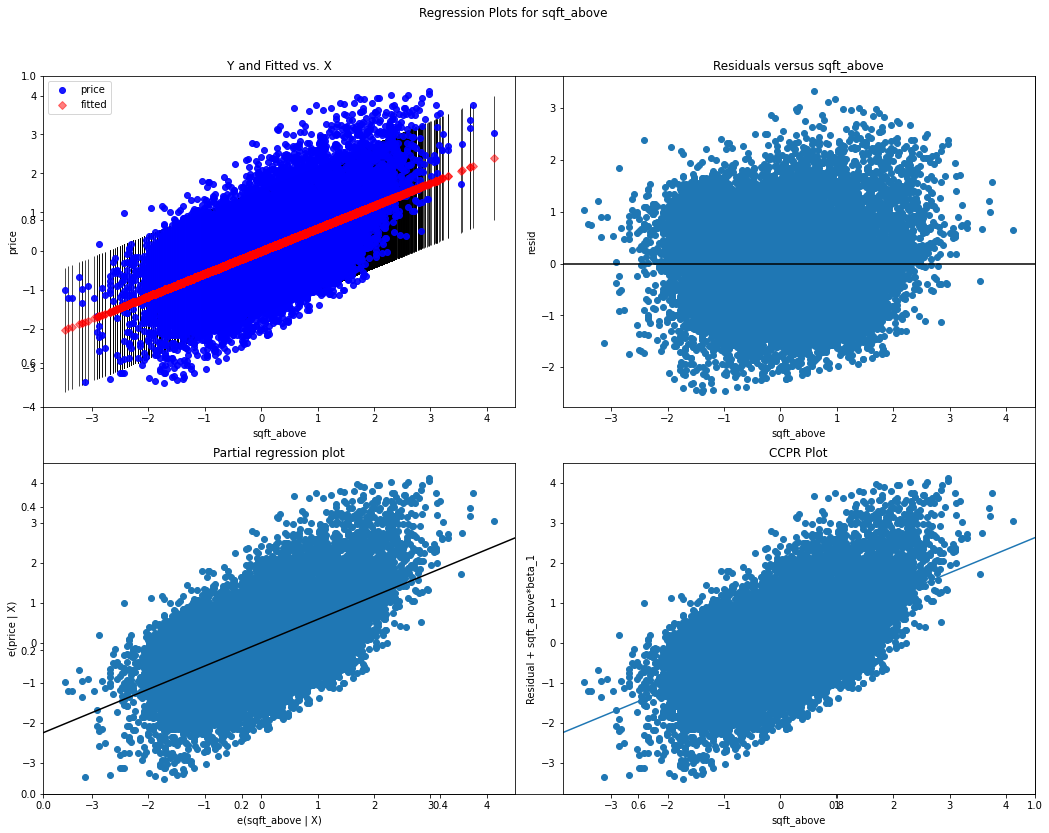

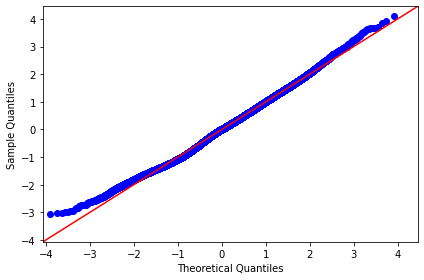

sqft_basement normality tests
['sqft_basement', 0.051029805987547694, -3.00454106039183e-15, 0.22589777773928515, 2.0489905787196533e-247, 748.3071748606354]


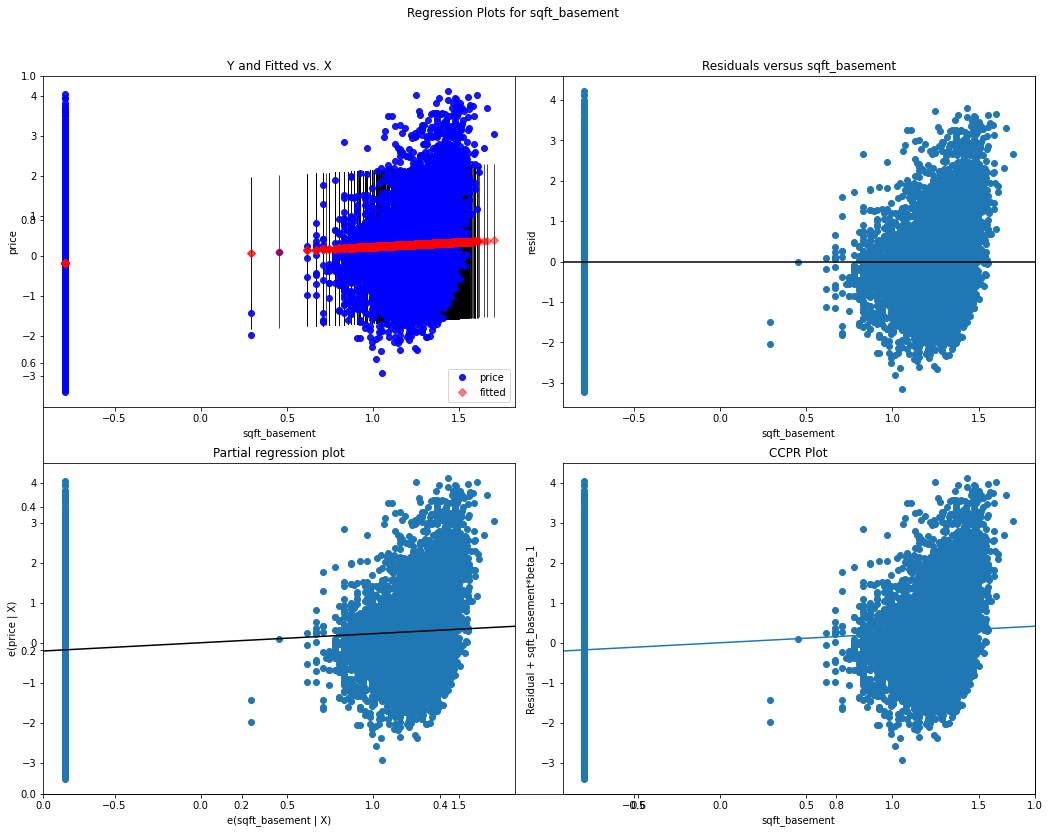

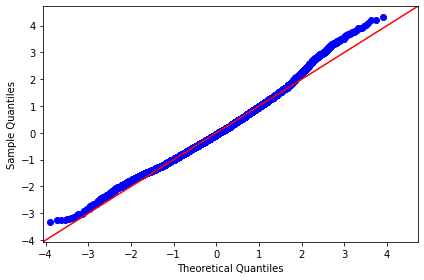

yr_built normality tests
['yr_built', 0.005995375270845926, -4.926614671774132e-15, 0.07742980867111876, 5.0937233946471084e-30, 838.5324646017624]


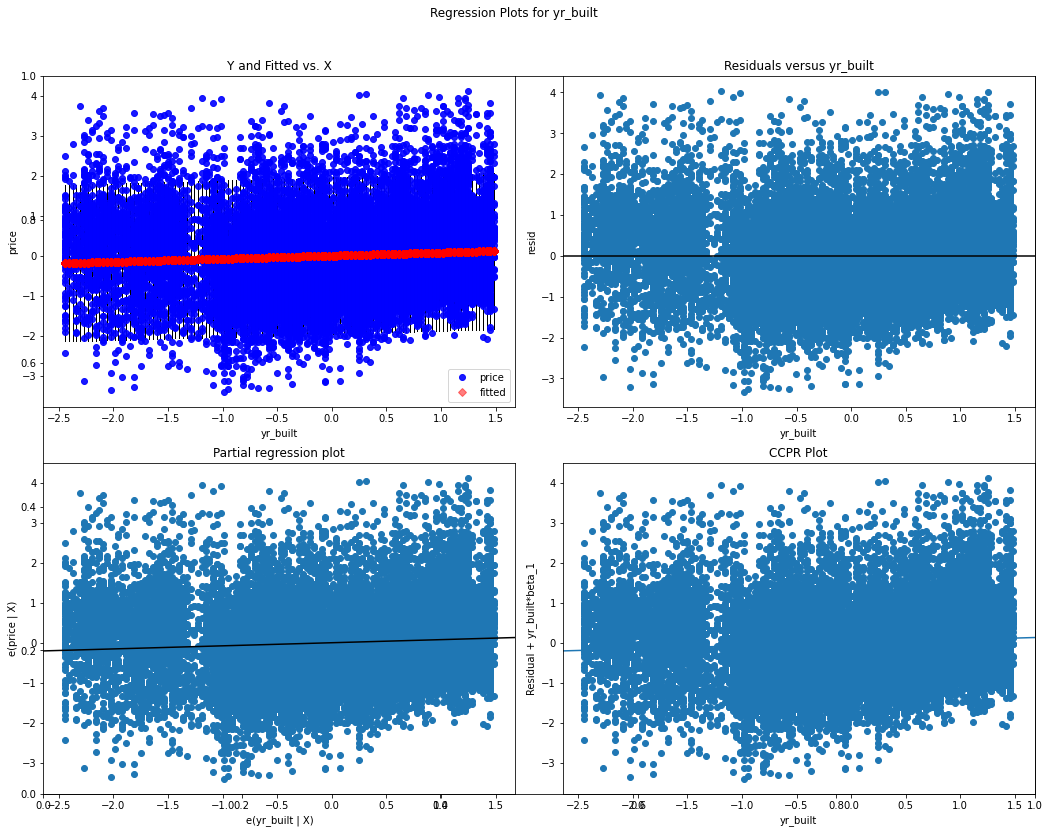

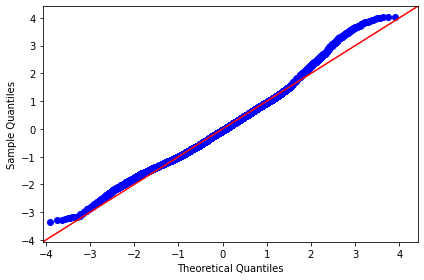

yr_renovated normality tests
['yr_renovated', 0.010866023520732182, -3.00454106039183e-15, 0.10424022026421234, 3.948445558953866e-53, 742.195120495396]


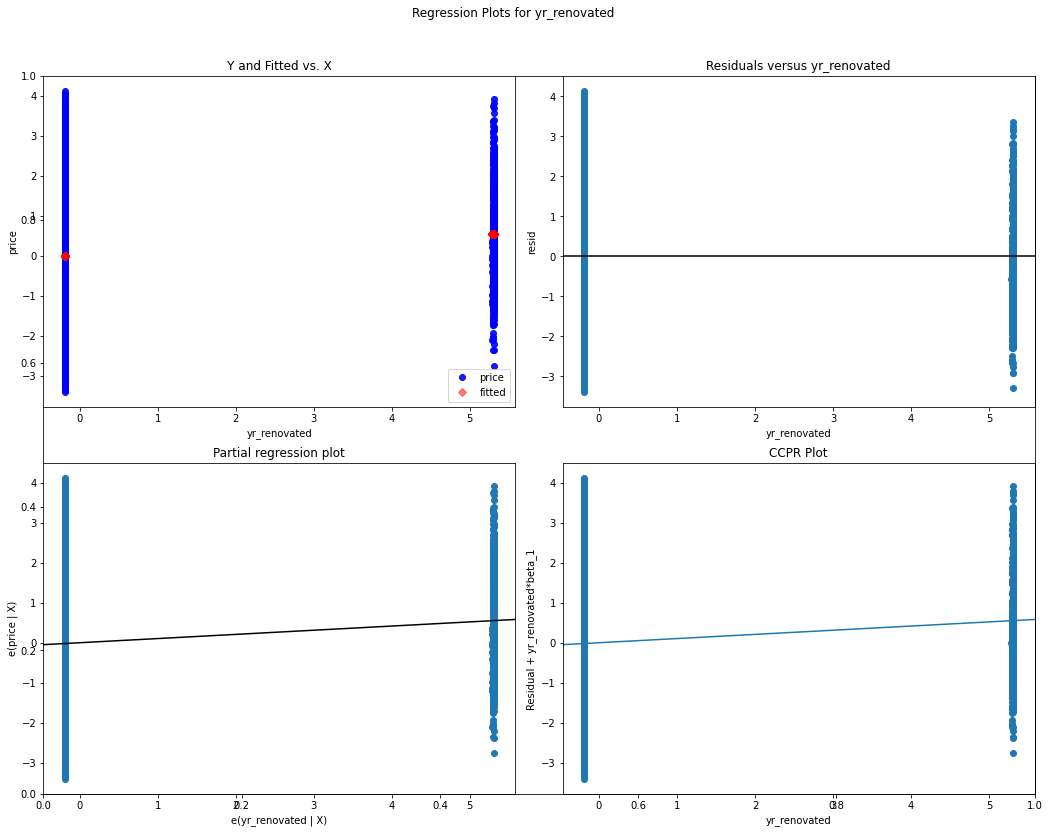

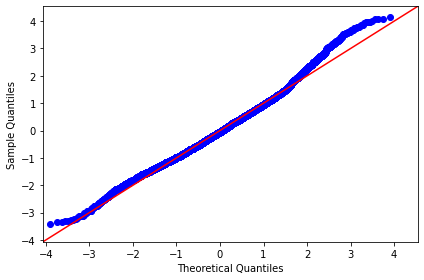

lat normality tests
['lat', 0.20480259105398546, 1.3097162243624894e-14, 0.452551202687591, 0.0, 2119.222447092599]


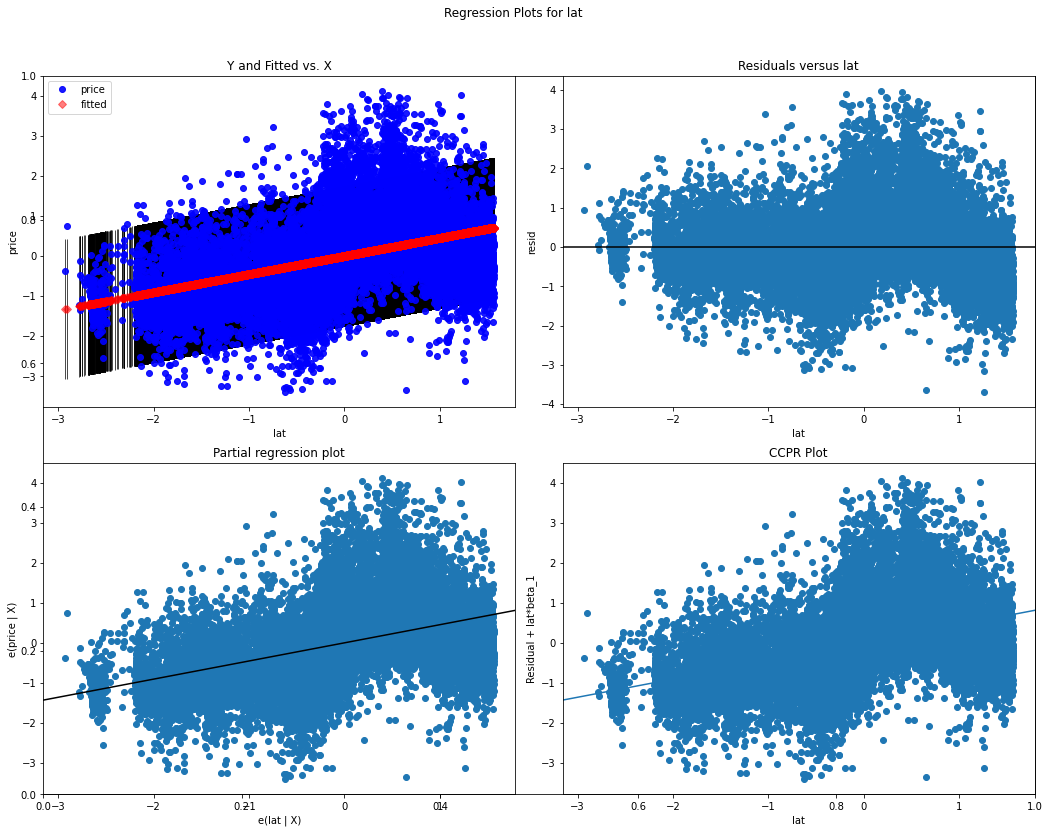

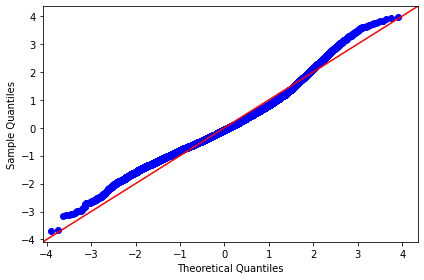

long normality tests
['long', 0.002503775999697533, -3.910066714851723e-15, -0.0500377457495603, 1.989386268703832e-13, 850.5718330556911]


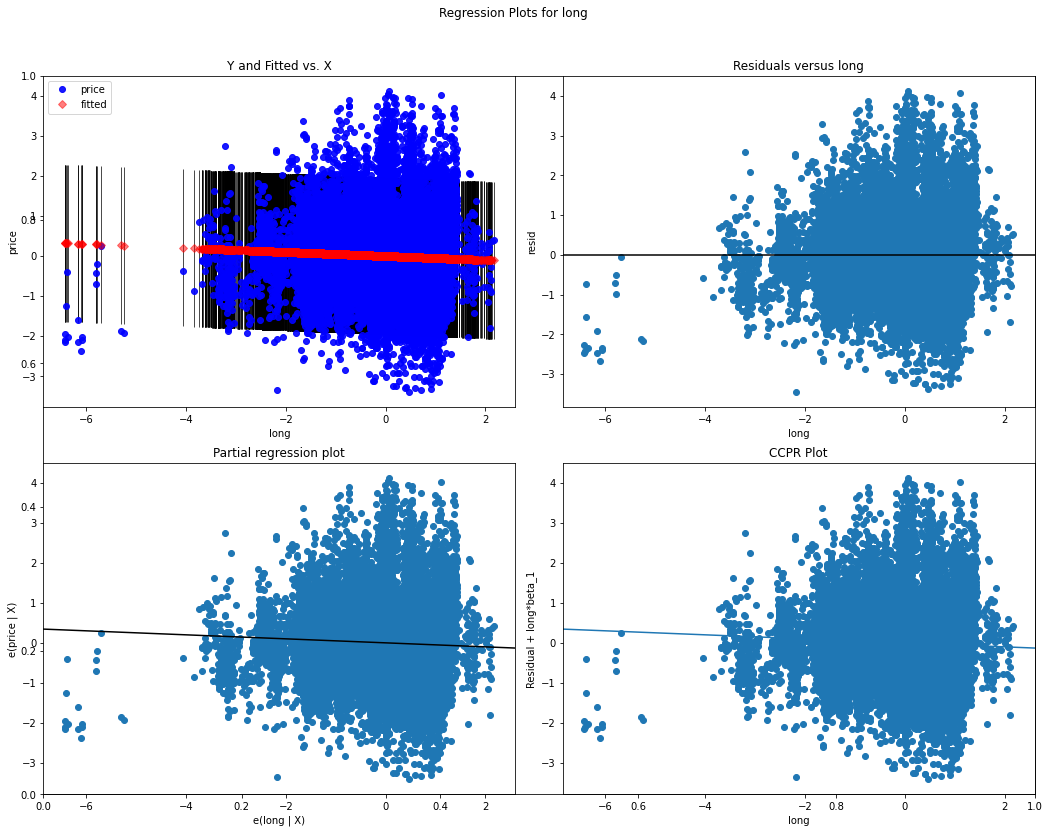

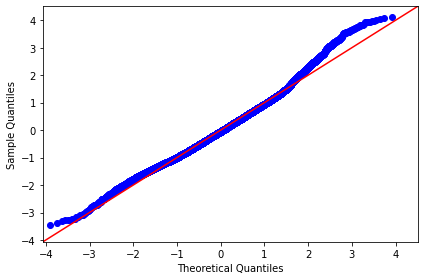

sqft_living15 normality tests
['sqft_living15', 0.36781383073367013, -3.00454106039183e-15, 0.6064765706386932, 0.0, 339.3135041339571]


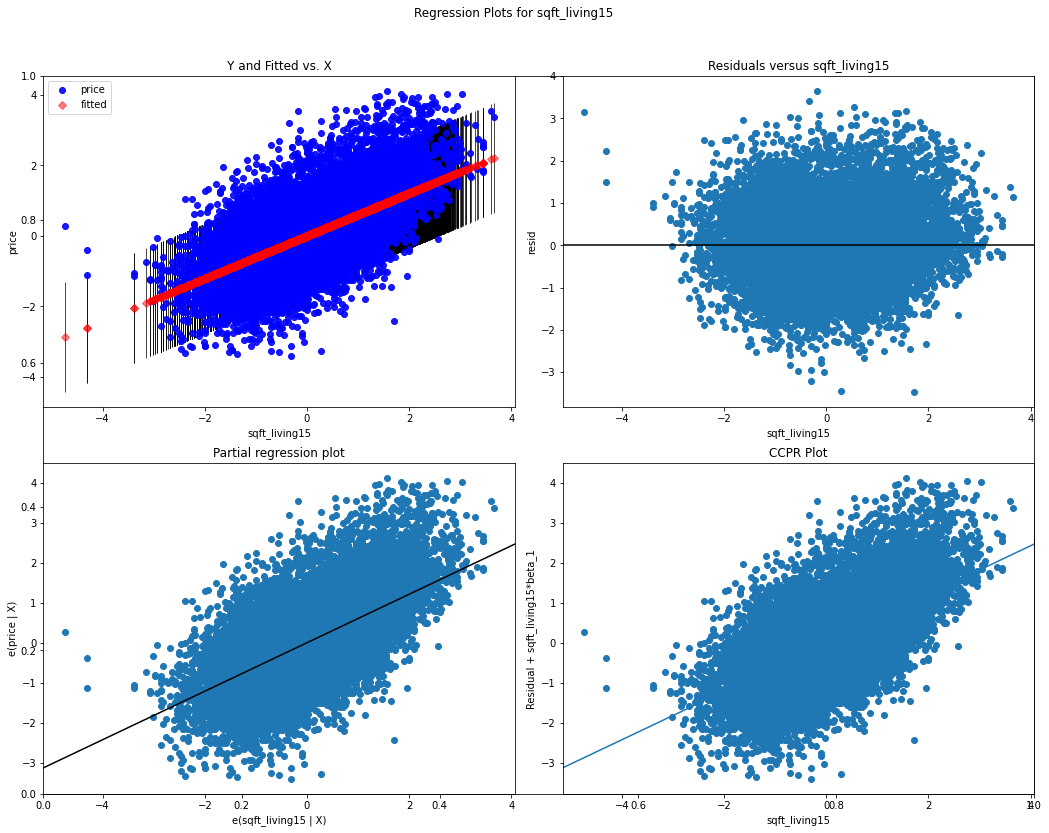

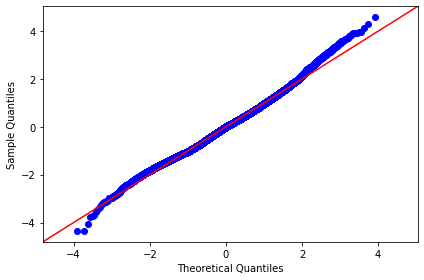

sqft_lot15 normality tests
['sqft_lot15', 0.014461351160781954, -3.00454106039183e-15, 0.12025535813751555, 3.1401673849923806e-70, 570.1185800712748]


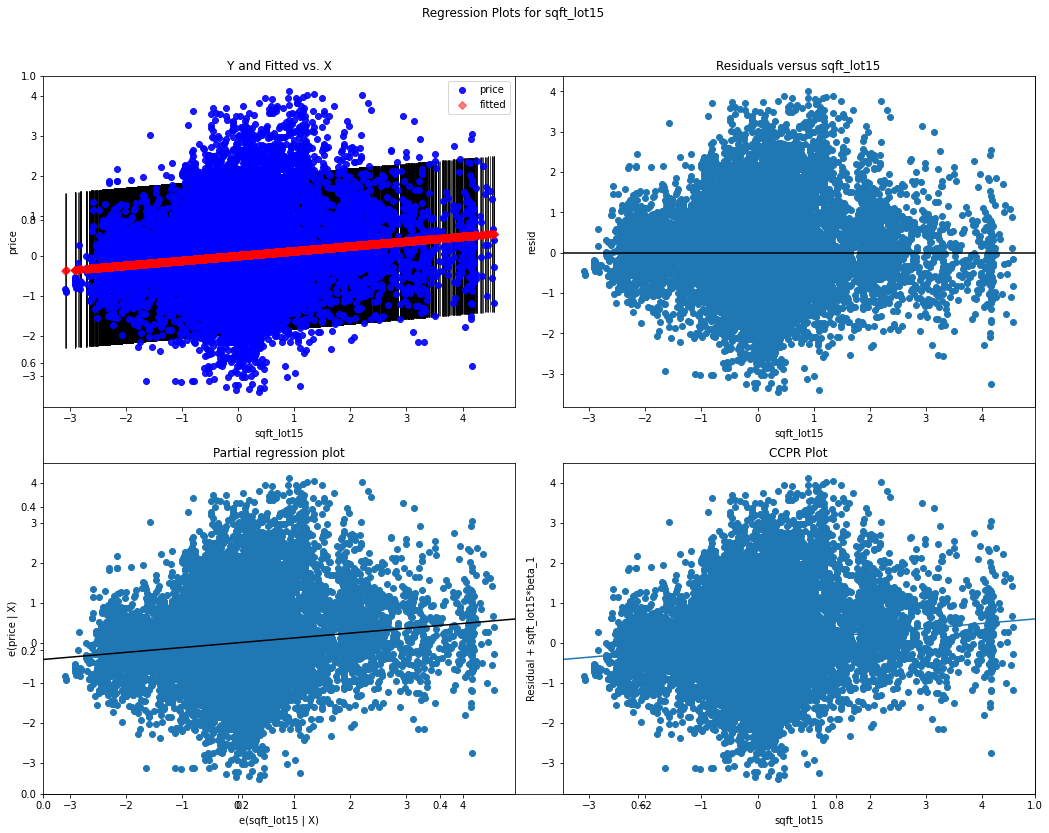

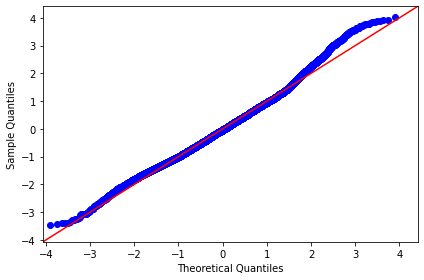

year_sold normality tests
['year_sold', 2.418851999219651e-05, 1.3742479376688266e-14, 0.004918182590370161, 0.4703369516047444, 798.2449063298861]


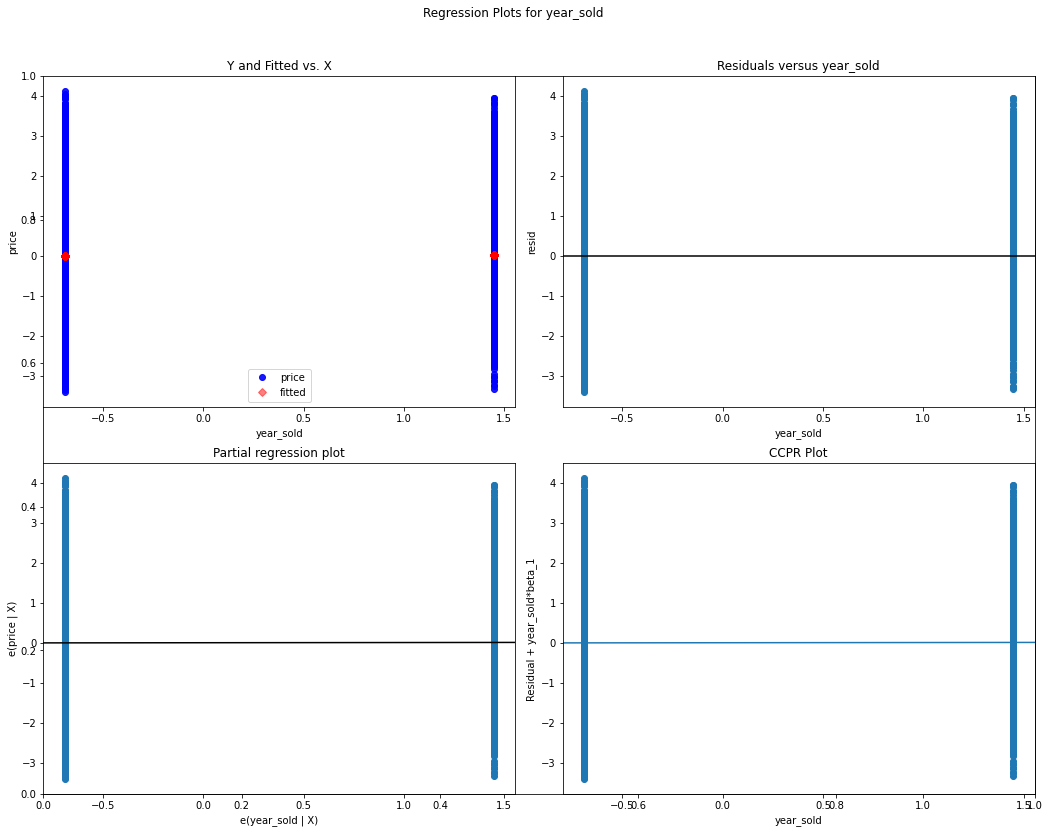

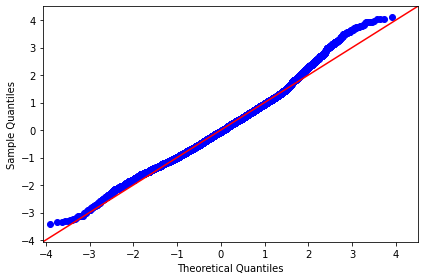

In [27]:
results=[]
for col in preprocessed.columns:
    f = f'price~{col}'
    model = smf.ols(formula=f, data=preprocessed).fit()

    print(f'{col} normality tests')
    result=[col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]]
    results.append(result)
    print(result)
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

In [29]:
lin_assump = ['sqft_living15', 'lat', 'sqft_basement', 'sqft_above', 'grade', 'sqft_living', 'bathrooms', 'bedrooms']

In [30]:
X_w_ass = X[lin_assump]
X_w_ass.head()

sqft_living15       lat  sqft_basement  sqft_above     grade  sqft_living  \
0      -1.034771 -0.353017      -0.788022   -0.753188 -0.525665    -1.126903   
1      -0.325589  1.160122       1.153823    0.677794 -0.525665     0.714843   
2       1.128792  1.281720      -0.788022   -1.755886 -1.561499    -2.136939   
3      -0.989495 -0.283633       1.346269   -1.027362 -0.525665     0.073723   
4      -0.132880  0.409435      -0.788022    0.076631  0.371615    -0.291011   

   bathrooms  bedrooms  
0  -1.728095 -0.279539  
1   0.342214 -0.279539  
2  -1.728095 -1.712765  
3   1.076668  0.737351  
4   0.041513 -0.279539

In [31]:
w_ass = np.mean(cross_val_score(regression, X_w_ass, y, scoring='r2', cv=crossvalidation))

In [32]:
w_ass

0.7017023637472625

In [33]:
co_df=X.corr().abs().stack().reset_index().sort_values(0, ascending=False)
co_df

level_0     level_1         0
0      bedrooms    bedrooms  1.000000
171  sqft_above  sqft_above  1.000000
57     sqft_lot    sqft_lot  1.000000
76       floors      floors  1.000000
95   waterfront  waterfront  1.000000
..          ...         ...       ...
317   year_sold    yr_built  0.003376
312   year_sold        view  0.002902
125        view   year_sold  0.002902
269        long   year_sold  0.000975
320   year_sold        long  0.000975

[324 rows x 3 columns]

In [34]:
co_df['pairs'] = list(zip(co_df.level_0, co_df.level_1))
co_df.set_index(['pairs'], inplace = True)

co_df

level_0     level_1         0
pairs                                                     
(bedrooms, bedrooms)        bedrooms    bedrooms  1.000000
(sqft_above, sqft_above)  sqft_above  sqft_above  1.000000
(sqft_lot, sqft_lot)        sqft_lot    sqft_lot  1.000000
(floors, floors)              floors      floors  1.000000
(waterfront, waterfront)  waterfront  waterfront  1.000000
...                              ...         ...       ...
(year_sold, yr_built)      year_sold    yr_built  0.003376
(year_sold, view)          year_sold        view  0.002902
(view, year_sold)               view   year_sold  0.002902
(long, year_sold)               long   year_sold  0.000975
(year_sold, long)          year_sold        long  0.000975

[324 rows x 3 columns]

In [116]:
co_df.drop(columns=['level_1', 'level_0'], inplace = True)
co_df.columns = ['cc']
co_df.drop_duplicates(inplace=True)
co_df = co_df[(co_df.cc>.75) & (co_df.cc<1)]
co_df

cc
pairs                              
(sqft_lot15, sqft_lot)     0.919531
(sqft_above, sqft_living)  0.863984
(bathrooms, sqft_living)   0.759533

In [35]:
X.drop(columns=['sqft_lot15', 'sqft_above', 'bathrooms'], inplace = True)

In [153]:
y

price
0     -1.406675
1      0.284770
2     -1.806354
3      0.505772
4      0.182691
...         ...
21592 -0.482530
21593 -0.281305
21594 -0.271300
21595 -0.281305
21596 -0.677870

[21549 rows x 1 columns]

In [36]:
no_co = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

In [37]:
no_co

0.7631969255532314

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(X, y)

In [39]:
selected_columns = X.columns[selector.support_ ]
print(selected_columns)

Index(['sqft_living', 'view', 'grade', 'yr_built', 'lat'], dtype='object')


In [40]:
x_sel = X[selected_columns]
x_sel

sqft_living      view     grade  yr_built       lat
0        -1.126903 -0.324805 -0.525665 -0.537048 -0.353017
1         0.714843 -0.324805 -0.525665 -0.673981  1.160122
2        -2.136939 -0.324805 -1.561499 -1.293675  1.281720
3         0.073723 -0.324805 -0.525665 -0.195937 -0.283633
4        -0.291011 -0.324805  0.371615  0.548437  0.409435
...            ...       ...       ...       ...       ...
21592    -0.512303 -0.324805  0.371615  1.284614  1.003924
21593     0.462480 -0.324805  0.371615  1.450802 -0.356631
21594    -1.471671 -0.324805 -0.525665  1.284614  0.247844
21595    -0.406453 -0.324805  0.371615  1.118011 -0.184641
21596    -1.471671 -0.324805 -0.525665  1.251326  0.245679

[21549 rows x 5 columns]

In [154]:
fivebest = np.mean(cross_val_score(regression, x_sel, y, scoring='r2', cv=crossvalidation))
fivebest

0.7396584905960688

In [155]:
y

price
0     -1.406675
1      0.284770
2     -1.806354
3      0.505772
4      0.182691
...         ...
21592 -0.482530
21593 -0.281305
21594 -0.271300
21595 -0.281305
21596 -0.677870

[21549 rows x 1 columns]

In [41]:
combs = combinations(X.columns, 2)
 
interactions=[]

data_int = X.copy()
for i, (a, b) in enumerate(combs):
    data_int['interaction'] = data_int[a] * data_int[b]
    score = np.mean(cross_val_score(regression, data_int, y, scoring='r2', cv=crossvalidation))
    print(score)
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0.7660573275634694
0
0.7631717304985652
0.7647152850800047
0.7632091164829939
0.7632134351751932
0.7631511199939222
0.7669302221538705
0.7632449621101582
0.7635902072467908
0.7632989254682895
0.7632516788937653
0.763318596701503
0.7640832095859307
0.7632267810246762
0.7634172877183492
0.765187506456005
0.7632315262824964
0.763275484684274
0.7631727465175444
0.7696007070583324
0.7636104067956726
0.7652233672400219
0.763384405970996
0.7631851632863571
0.763177096724073
0.7646855736069134
0.7632615997706383
0.763294302806884
0.7631792659715866
0.7633064914888334
0.7631673893295118
0.7631669992843131
0.7639954903786093
0.7641677307853622
0.7631504573319396
0.7684114288305444
0.7649740597675783
0.7635410183522808
0.7631658073901431
0.7631642540128956
0.7631576500304517
0.7631869369303501
0.7647176248605236
0.7653680003283861
0.763777758492645
0.7632795892818204
0.7631830855393659
0.7642959628987407
0.7631551728002435
0.7631917547357563
0.763196795606593
50
0.763185378647455
0.76317219496974

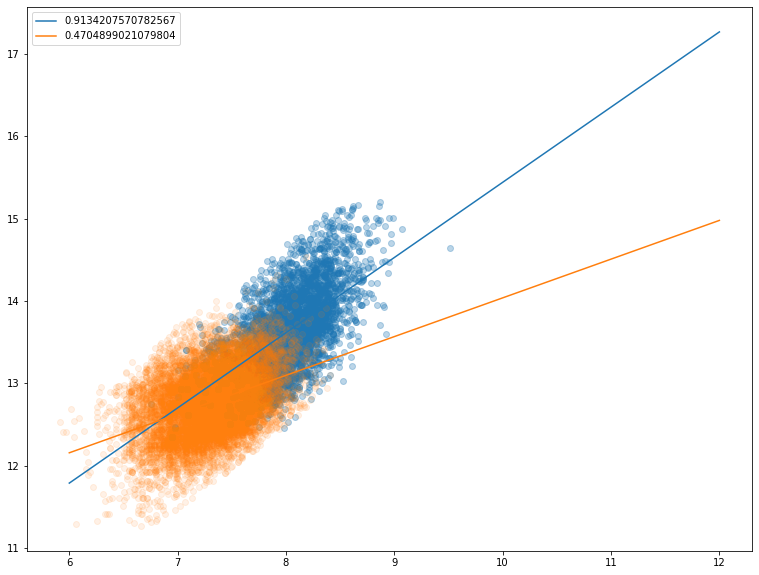

In [42]:
fig, ax = plt.subplots(figsize=(13, 10))

col = 'sqft_living'

is_in = no_outliers.loc[no_outliers['grade'] >8, [col, 'price']]

linreg = LinearRegression()
linreg.fit(np.log(is_in[[col]]), np.log(is_in['price']))

preds = linreg.predict(np.log(is_in[[col]]))

ax.scatter(np.log(is_in[[col]]), np.log(is_in['price']), alpha=.3, label=None)

x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label= linreg.coef_[0])

not_in = no_outliers.loc[no_outliers['grade'] <8, [col, 'price']]

linreg = LinearRegression()
linreg.fit(np.log(not_in[[col]]), np.log(not_in['price']))

preds = linreg.predict(np.log(not_in[[col]]))

ax.scatter(np.log(not_in[[col]]), np.log(not_in['price']), alpha=.1, label=None)

x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=linreg.coef_[0])

ax.legend()

In [43]:
final = X.copy()

final['sqft_living * grade'] = final['sqft_living'] * final['grade']

final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

final_model

0.7696007070583324

In [49]:
final

bedrooms  sqft_living  sqft_lot    floors  waterfront      view  \
0     -0.279539    -1.126903 -0.386683 -0.960104   -0.080864 -0.324805   
1     -0.279539     0.714843 -0.106888  1.007599   -0.080864 -0.324805   
2     -1.712765    -2.136939  0.256815 -0.960104   -0.080864 -0.324805   
3      0.737351     0.073723 -0.524435 -0.960104   -0.080864 -0.324805   
4     -0.279539    -0.291011  0.016524 -0.960104   -0.080864 -0.324805   
...         ...          ...       ...       ...         ...       ...   
21592 -0.279539    -0.512303 -2.199693  2.158631   -0.080864 -0.324805   
21593  0.737351     0.462480 -0.354627  1.007599   -0.080864 -0.324805   
21594 -1.712765    -1.471671 -2.000193  1.007599   -0.080864 -0.324805   
21595 -0.279539    -0.406453 -1.357346  1.007599   -0.080864 -0.324805   
21596 -1.712765    -1.471671 -2.255881  1.007599   -0.080864 -0.324805   

       condition     grade  sqft_basement  yr_built  yr_renovated       lat  \
0      -0.613546 -0.525665      -0.788022 -0.537048     -0.188573 -0.353017   
1      -0.613546 -0.525665       1.153823 -0.673981      5.301377  1.160122   
2      -0.613546 -1.561499      -0.788022 -1.293675     -0.188573  1.281720   
3       2.204658 -0.525665       1.346269 -0.195937     -0.188573 -0.283633   
4      -0.613546  0.371615      -0.788022  0.548437     -0.188573  0.409435   
...          ...       ...            ...       ...           ...       ...   
21592  -0.613546  0.371615      -0.788022  1.284614     -0.188573  1.003924   
21593  -0.613546  0.371615      -0.788022  1.450802     -0.188573 -0.356631   
21594  -0.613546 -0.525665      -0.788022  1.284614     -0.188573  0.247844   
21595  -0.613546  0.371615      -0.788022  1.118011     -0.188573 -0.184641   
21596  -0.613546 -0.525665      -0.788022  1.251326     -0.188573  0.245679   

           long  sqft_living15  year_sold  sqft_living * grade  
0      0.304586      -1.034771  -0.690468             0.592374  
1      0.745755      -0.325589  -0.690468            -0.375768  
2      0.133750       1.128792   1.448226             3.336828  
3      1.272019      -0.989495  -0.690468            -0.038754  
4     -1.205621      -0.132880   1.448226            -0.108144  
...         ...            ...        ...                  ...  
21592  0.937807      -0.629545  -0.690468            -0.190379  
21593  1.051596      -0.082366   1.448226             0.171864  
21594  0.603467      -1.868664  -0.690468             0.773606  
21595 -1.034523      -0.879157   1.448226            -0.151044  
21596  0.603467      -1.868664  -0.690468             0.773606  

[21549 rows x 16 columns]

In [46]:
fin_con=pd.concat([final, y], axis=1)
fin_con

bedrooms  sqft_living  sqft_lot    floors  waterfront      view  \
0     -0.279539    -1.126903 -0.386683 -0.960104   -0.080864 -0.324805   
1     -0.279539     0.714843 -0.106888  1.007599   -0.080864 -0.324805   
2     -1.712765    -2.136939  0.256815 -0.960104   -0.080864 -0.324805   
3      0.737351     0.073723 -0.524435 -0.960104   -0.080864 -0.324805   
4     -0.279539    -0.291011  0.016524 -0.960104   -0.080864 -0.324805   
...         ...          ...       ...       ...         ...       ...   
21592 -0.279539    -0.512303 -2.199693  2.158631   -0.080864 -0.324805   
21593  0.737351     0.462480 -0.354627  1.007599   -0.080864 -0.324805   
21594 -1.712765    -1.471671 -2.000193  1.007599   -0.080864 -0.324805   
21595 -0.279539    -0.406453 -1.357346  1.007599   -0.080864 -0.324805   
21596 -1.712765    -1.471671 -2.255881  1.007599   -0.080864 -0.324805   

       condition     grade  sqft_basement  yr_built  yr_renovated       lat  \
0      -0.613546 -0.525665      -0.788022 -0.537048     -0.188573 -0.353017   
1      -0.613546 -0.525665       1.153823 -0.673981      5.301377  1.160122   
2      -0.613546 -1.561499      -0.788022 -1.293675     -0.188573  1.281720   
3       2.204658 -0.525665       1.346269 -0.195937     -0.188573 -0.283633   
4      -0.613546  0.371615      -0.788022  0.548437     -0.188573  0.409435   
...          ...       ...            ...       ...           ...       ...   
21592  -0.613546  0.371615      -0.788022  1.284614     -0.188573  1.003924   
21593  -0.613546  0.371615      -0.788022  1.450802     -0.188573 -0.356631   
21594  -0.613546 -0.525665      -0.788022  1.284614     -0.188573  0.247844   
21595  -0.613546  0.371615      -0.788022  1.118011     -0.188573 -0.184641   
21596  -0.613546 -0.525665      -0.788022  1.251326     -0.188573  0.245679   

           long  sqft_living15  year_sold  sqft_living * grade     price  
0      0.304586      -1.034771  -0.690468             0.592374 -1.406675  
1      0.745755      -0.325589  -0.690468            -0.375768  0.284770  
2      0.133750       1.128792   1.448226             3.336828 -1.806354  
3      1.272019      -0.989495  -0.690468            -0.038754  0.505772  
4     -1.205621      -0.132880   1.448226            -0.108144  0.182691  
...         ...            ...        ...                  ...       ...  
21592  0.937807      -0.629545  -0.690468            -0.190379 -0.482530  
21593  1.051596      -0.082366   1.448226             0.171864 -0.281305  
21594  0.603467      -1.868664  -0.690468             0.773606 -0.271300  
21595 -1.034523      -0.879157   1.448226            -0.151044 -0.281305  
21596  0.603467      -1.868664  -0.690468             0.773606 -0.677870  

[21549 rows x 17 columns]

bedrooms normality tests
['bedrooms', 0.11662507152793389, -3.00454106039183e-15, 0.34150413105544153, 0.0, 512.1583857574918]


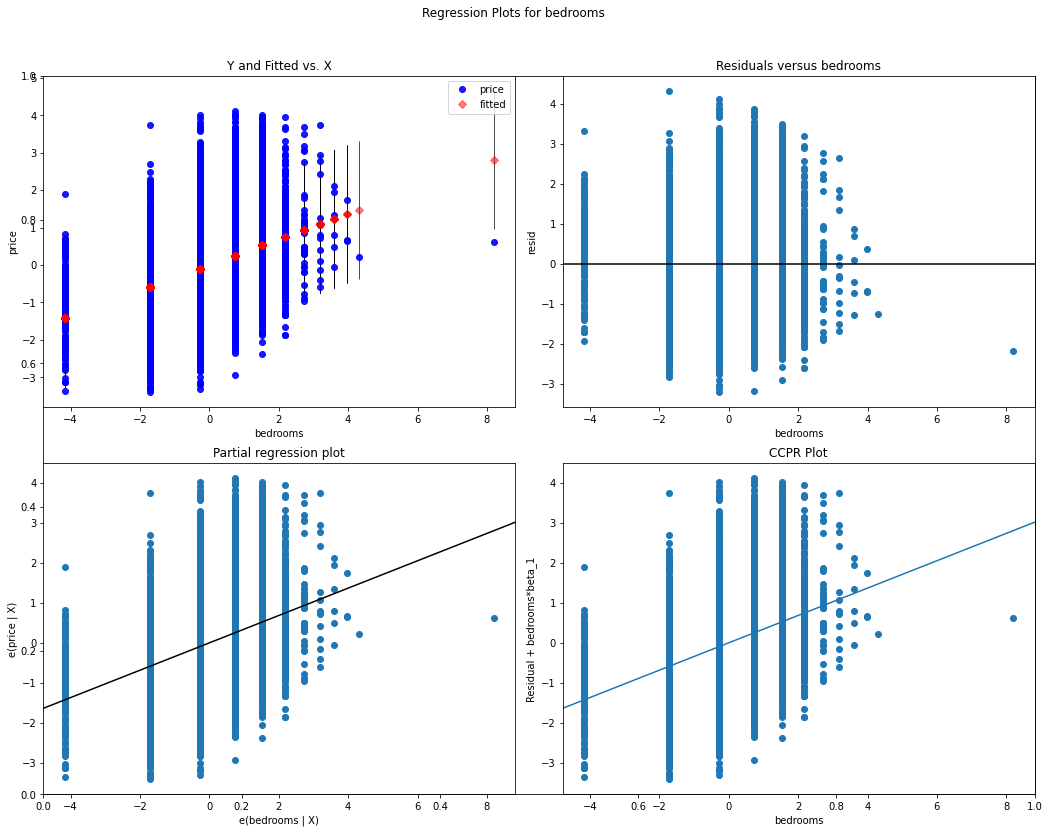

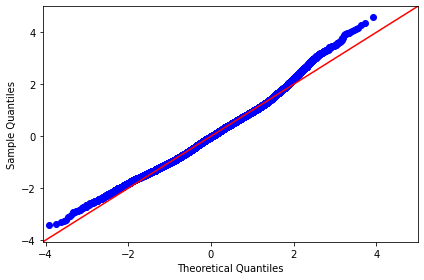

sqft_living normality tests
['sqft_living', 0.45154419086398756, -3.00454106039183e-15, 0.6719703794543239, 0.0, 111.91894981955326]


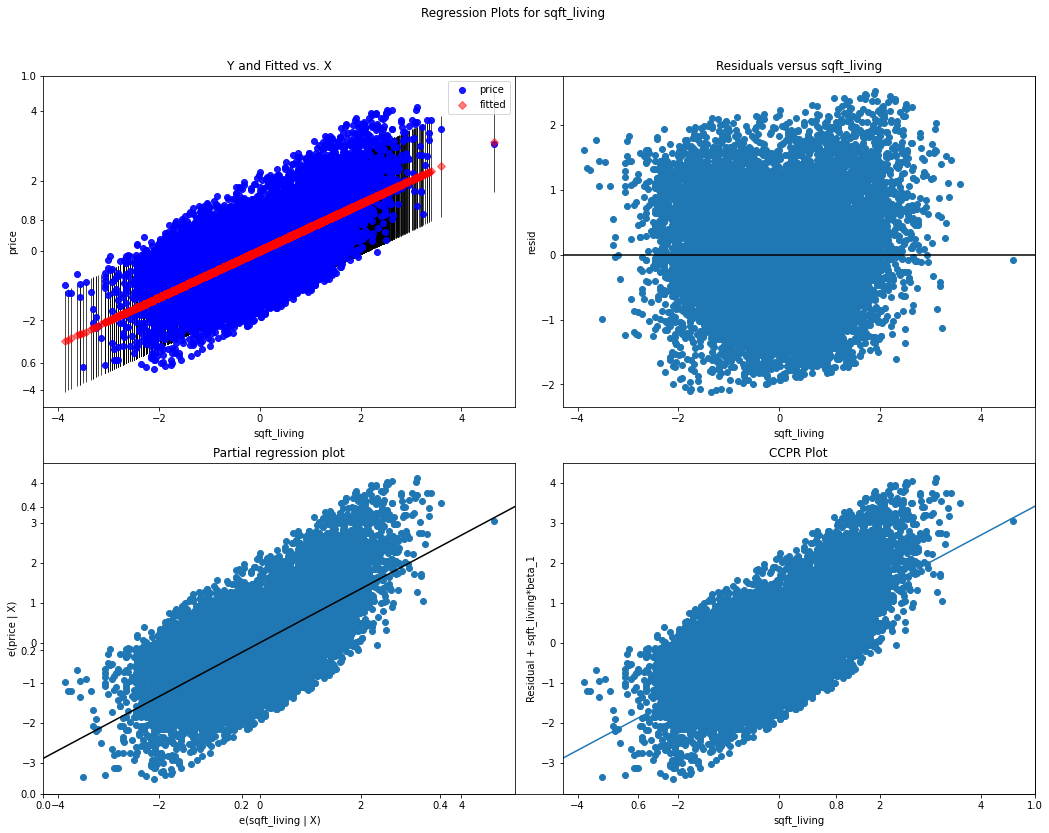

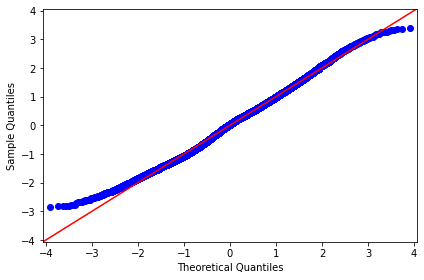

sqft_lot normality tests
['sqft_lot', 0.017812885813982104, -3.00454106039183e-15, 0.13346492353417047, 3.260842194113346e-86, 546.6267829759765]


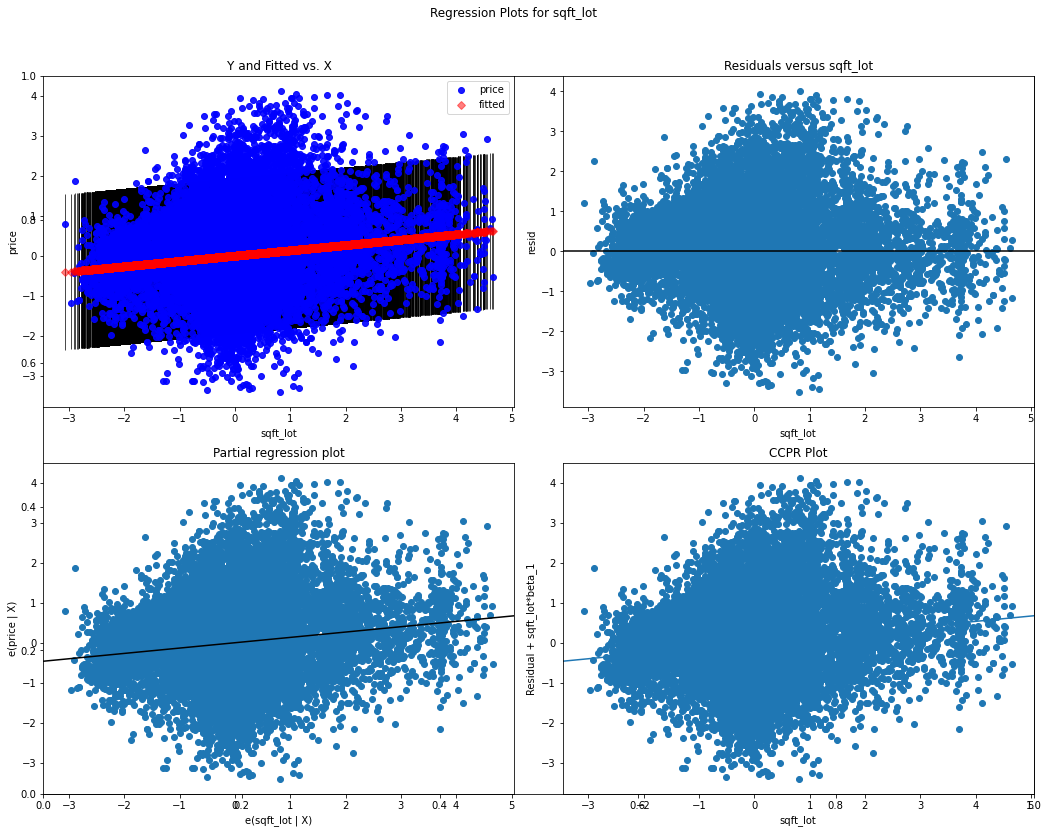

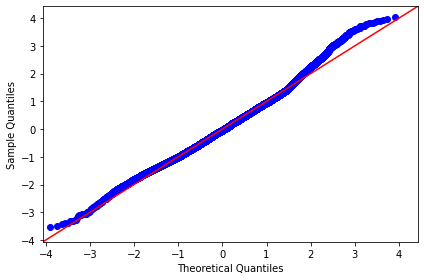

floors normality tests
['floors', 0.10392449968282746, -3.00454106039183e-15, 0.32237323040666366, 0.0, 787.8238746369583]


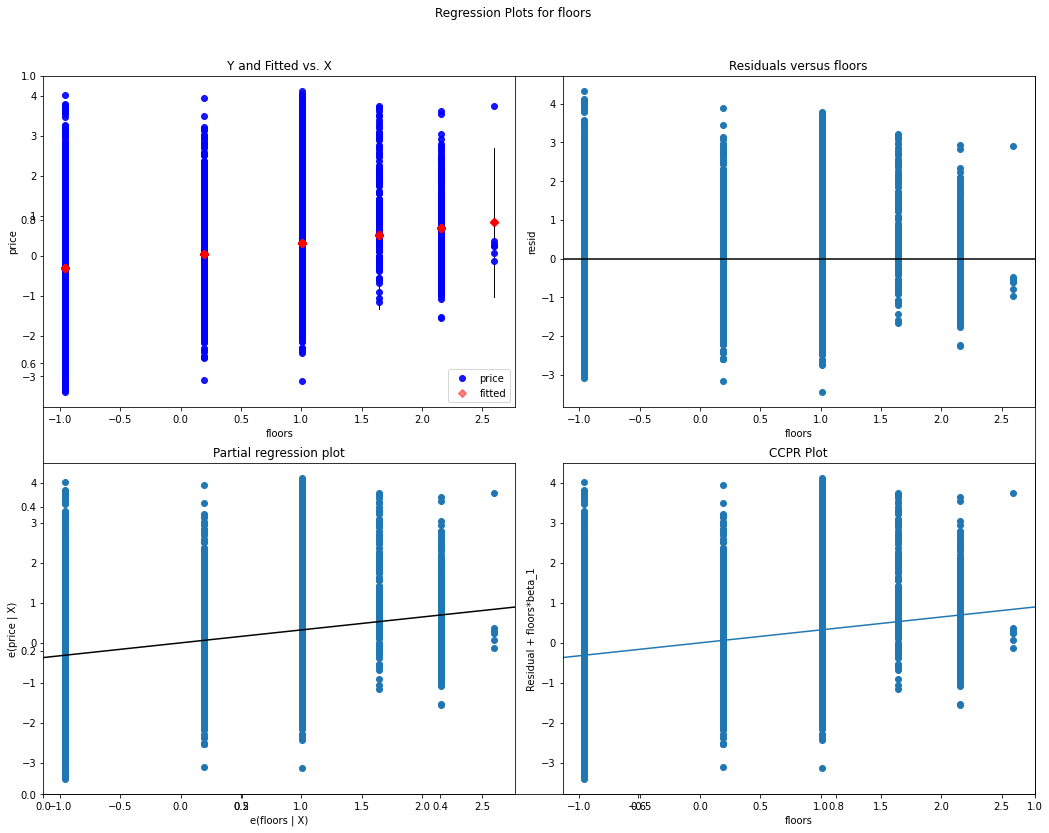

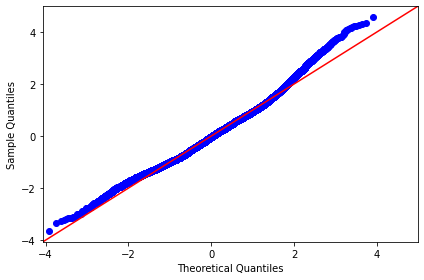

waterfront normality tests
['waterfront', 0.02609111161701494, -3.00454106039183e-15, 0.16152743301685382, 6.737030473593488e-126, 546.5383729280343]


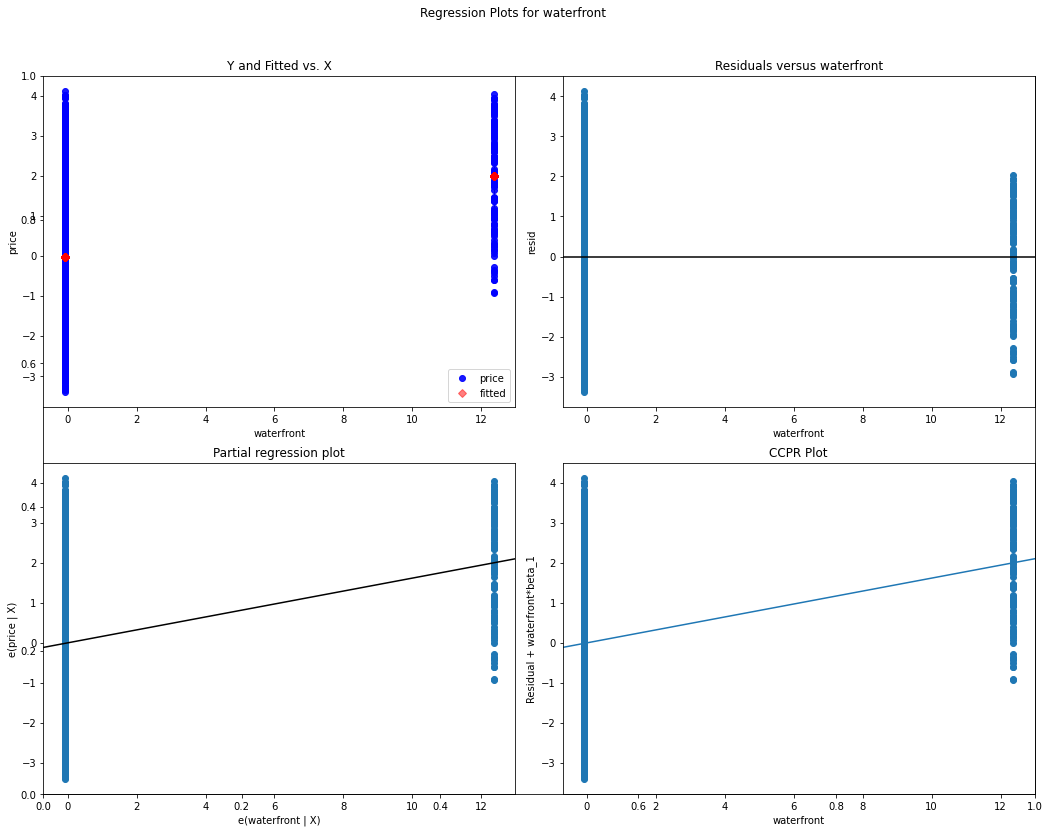

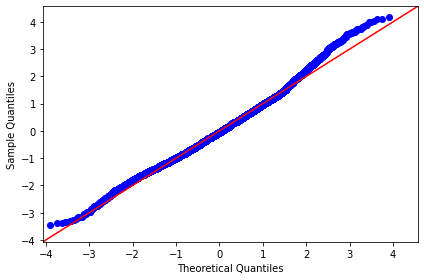

view normality tests
['view', 0.11286622721041295, -3.00454106039183e-15, 0.3359556923322095, 0.0, 306.5873488516771]


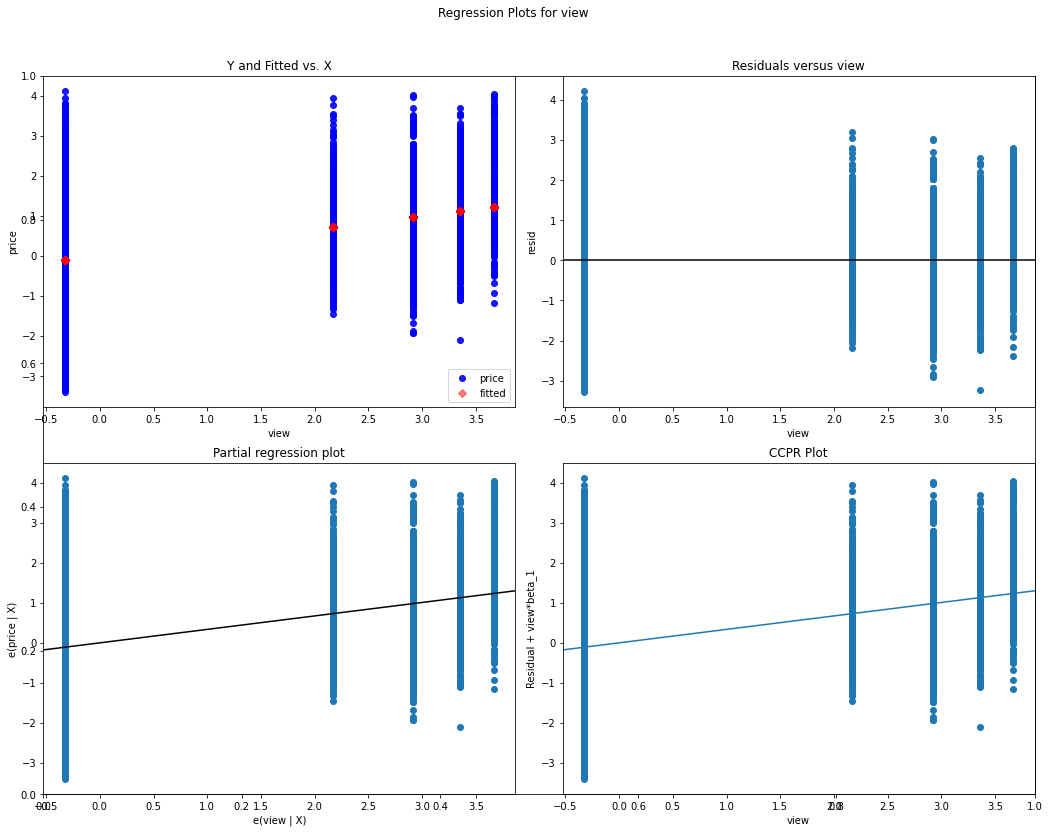

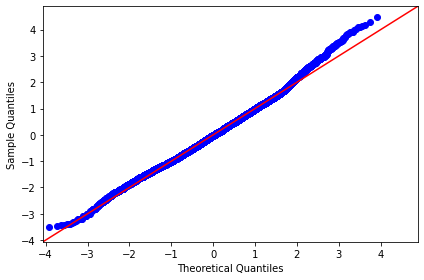

condition normality tests
['condition', 0.001972288550593837, -3.00454106039183e-15, 0.044410455419796435, 6.93265990765091e-11, 785.7890748672197]


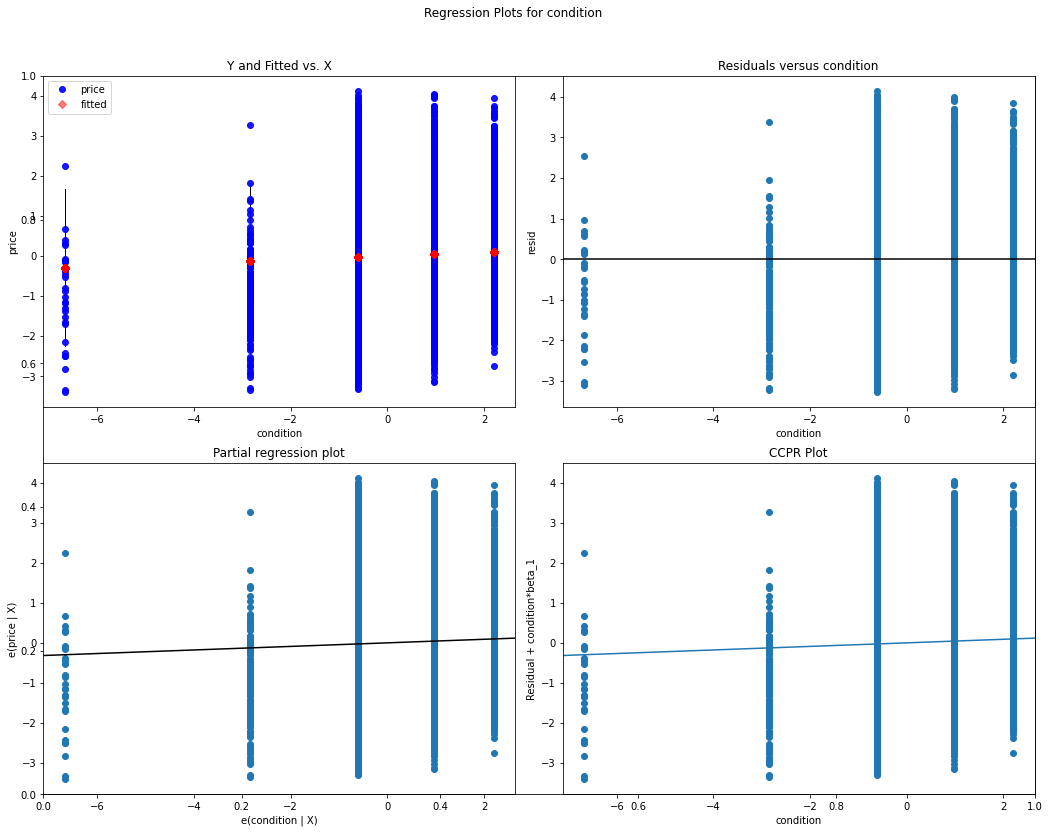

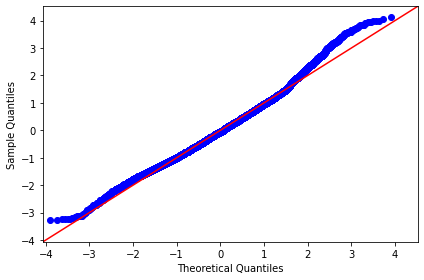

grade normality tests
['grade', 0.4782572067851023, -3.00454106039183e-15, 0.691561426617407, 0.0, 177.0272133431087]


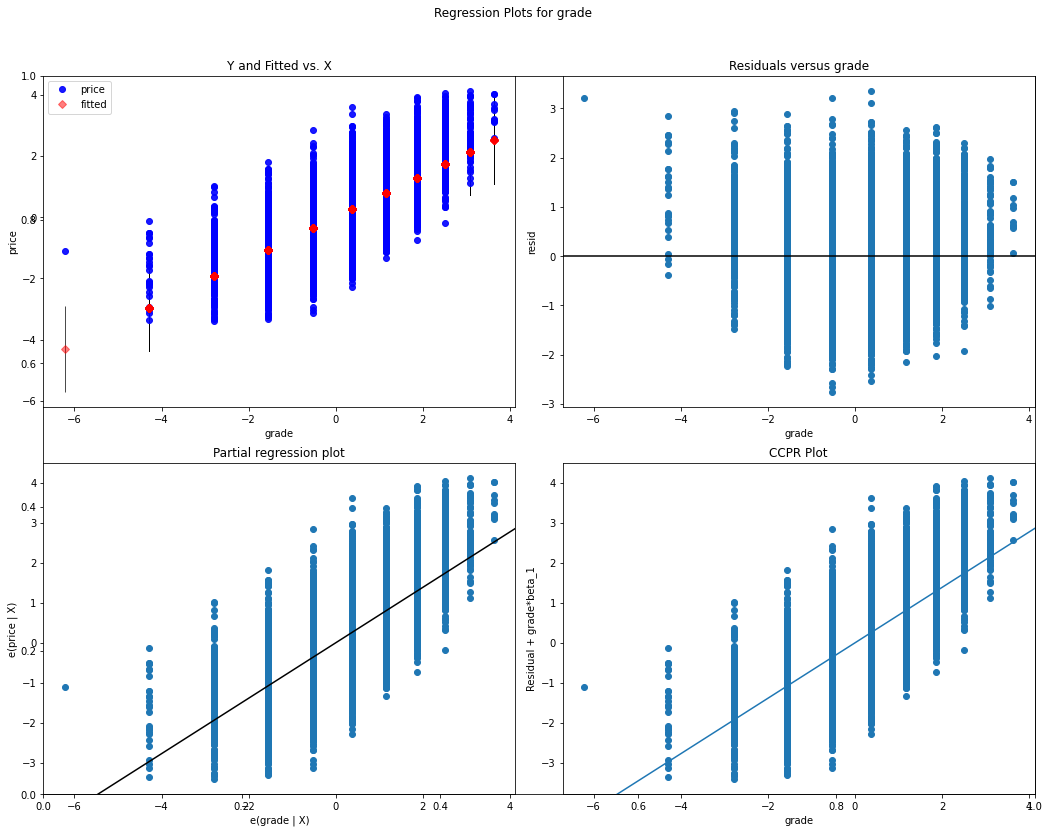

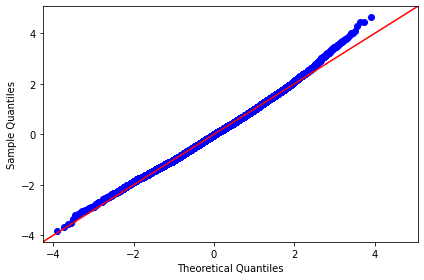

sqft_basement normality tests
['sqft_basement', 0.051029805987547694, -3.00454106039183e-15, 0.22589777773928515, 2.0489905787196533e-247, 748.3071748606354]


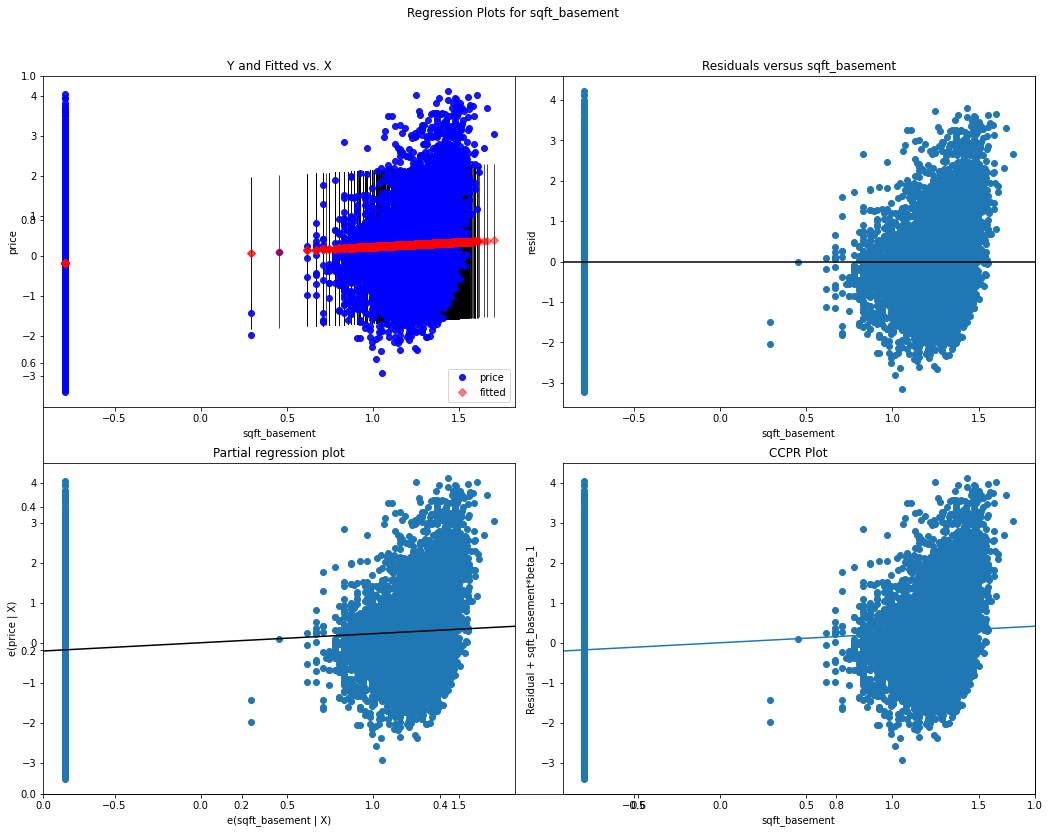

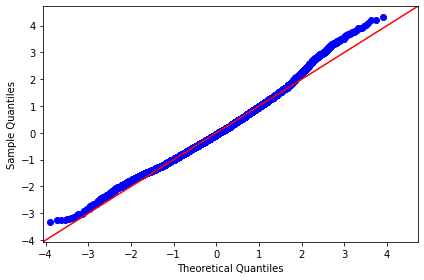

yr_built normality tests
['yr_built', 0.005995375270845926, -4.926614671774132e-15, 0.07742980867111876, 5.0937233946471084e-30, 838.5324646017624]


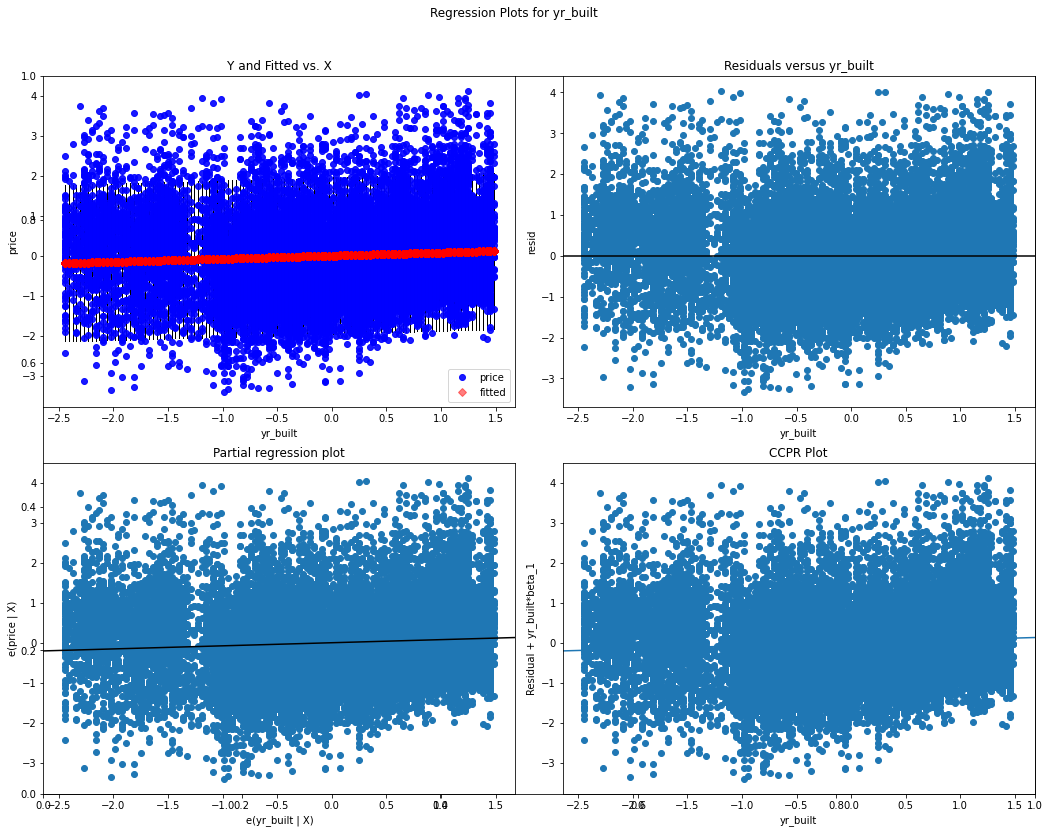

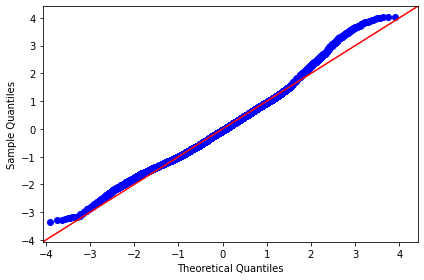

yr_renovated normality tests
['yr_renovated', 0.010866023520732182, -3.00454106039183e-15, 0.10424022026421234, 3.948445558953866e-53, 742.195120495396]


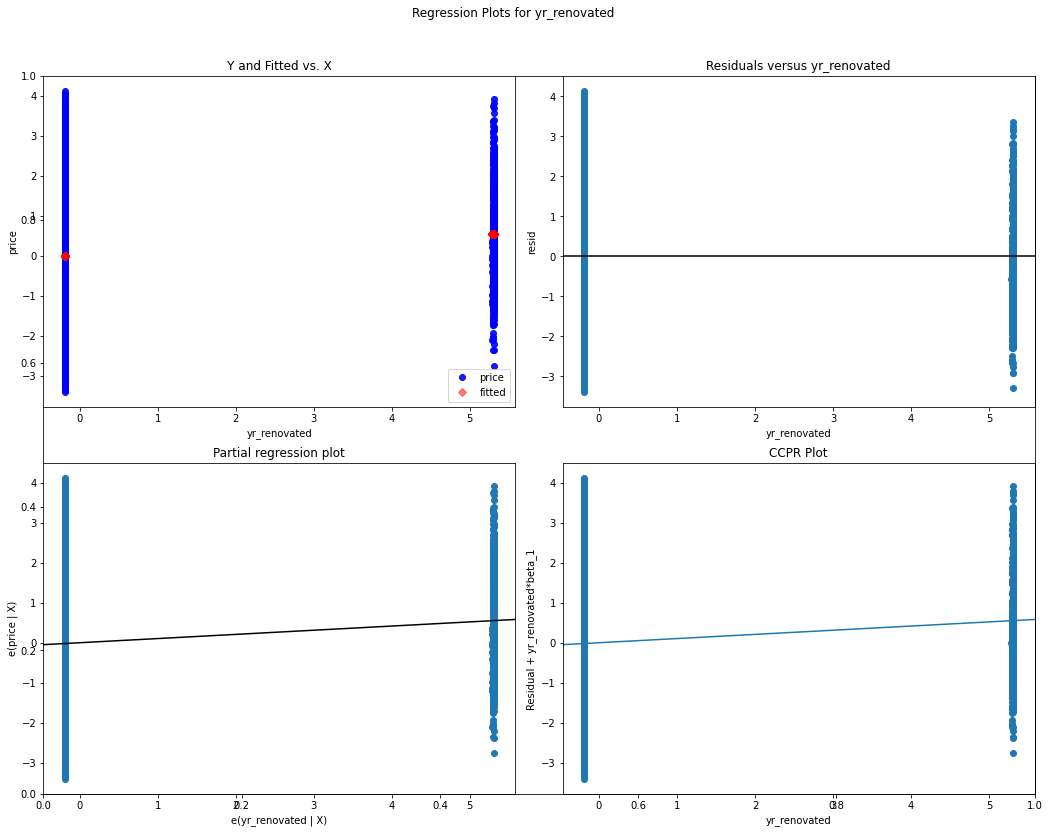

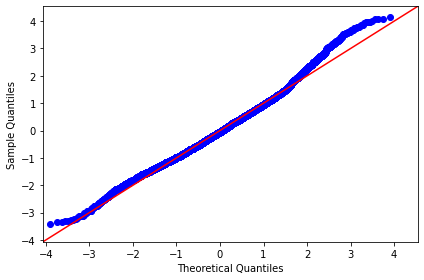

lat normality tests
['lat', 0.20480259105398546, 1.3097162243624894e-14, 0.452551202687591, 0.0, 2119.222447092599]


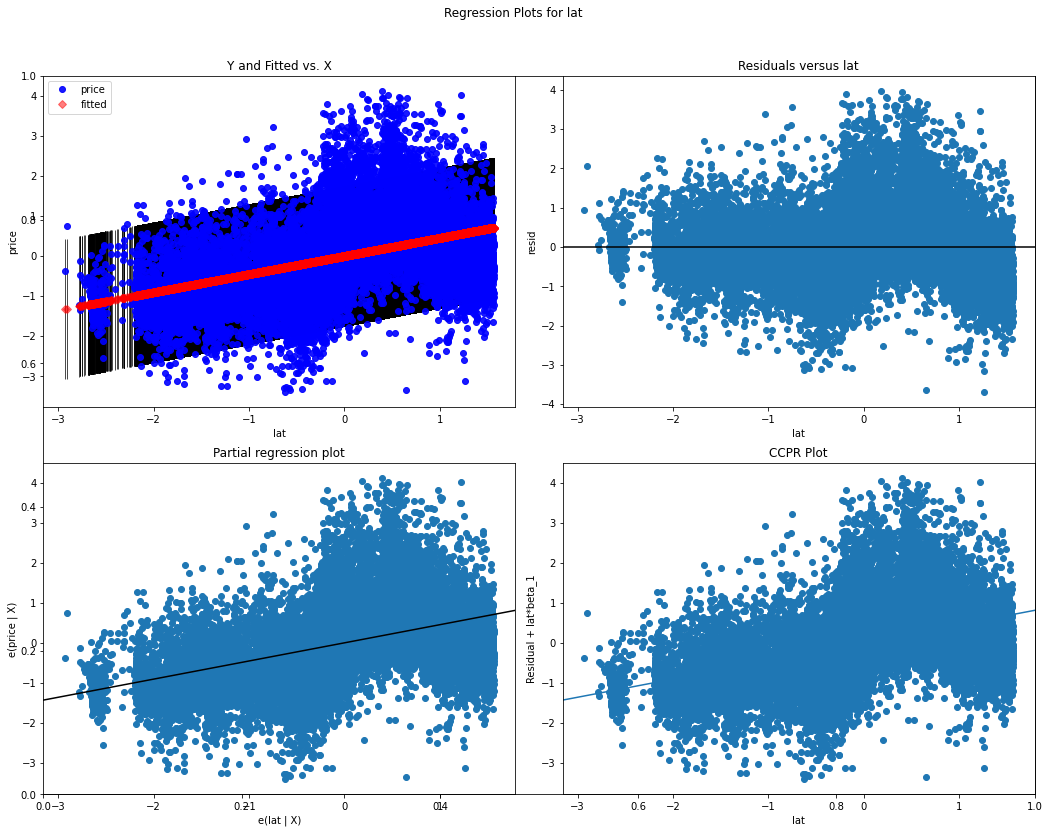

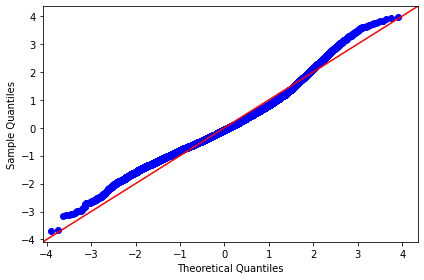

long normality tests
['long', 0.002503775999697533, -3.910066714851723e-15, -0.0500377457495603, 1.989386268703832e-13, 850.5718330556911]


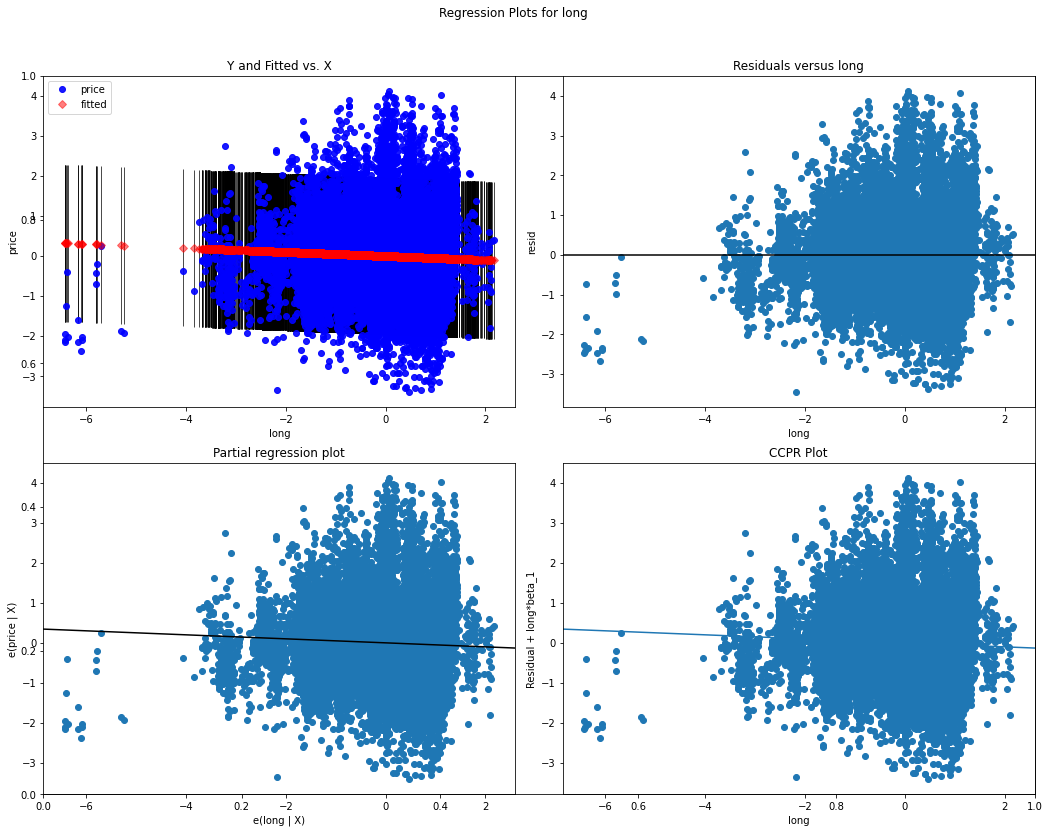

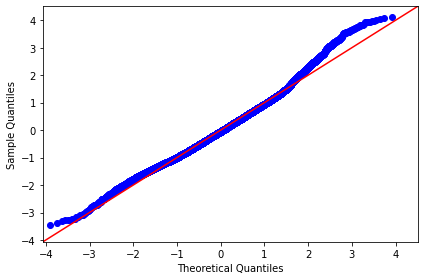

sqft_living15 normality tests
['sqft_living15', 0.36781383073367013, -3.00454106039183e-15, 0.6064765706386932, 0.0, 339.3135041339571]


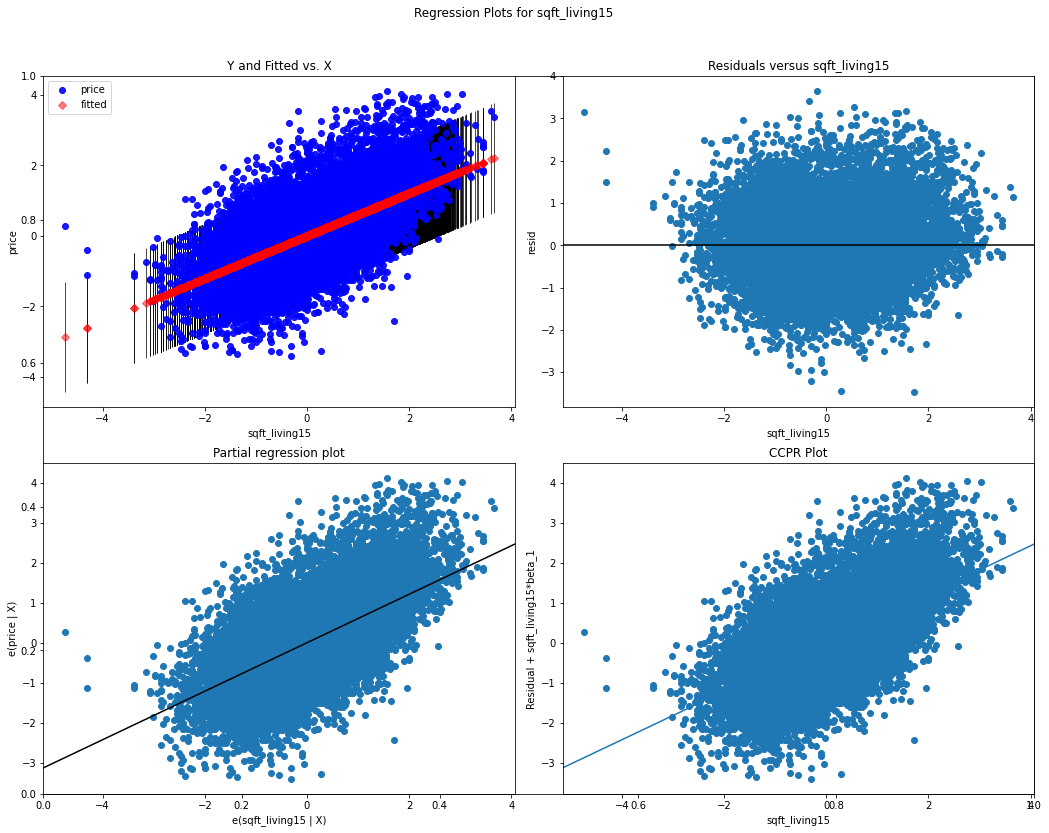

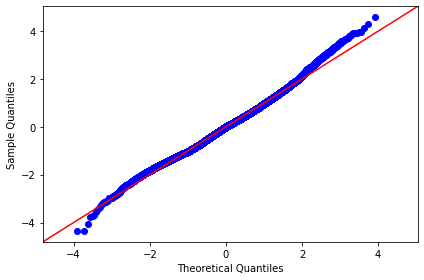

year_sold normality tests
['year_sold', 2.418851999219651e-05, 1.3742479376688266e-14, 0.004918182590370161, 0.4703369516047444, 798.2449063298861]


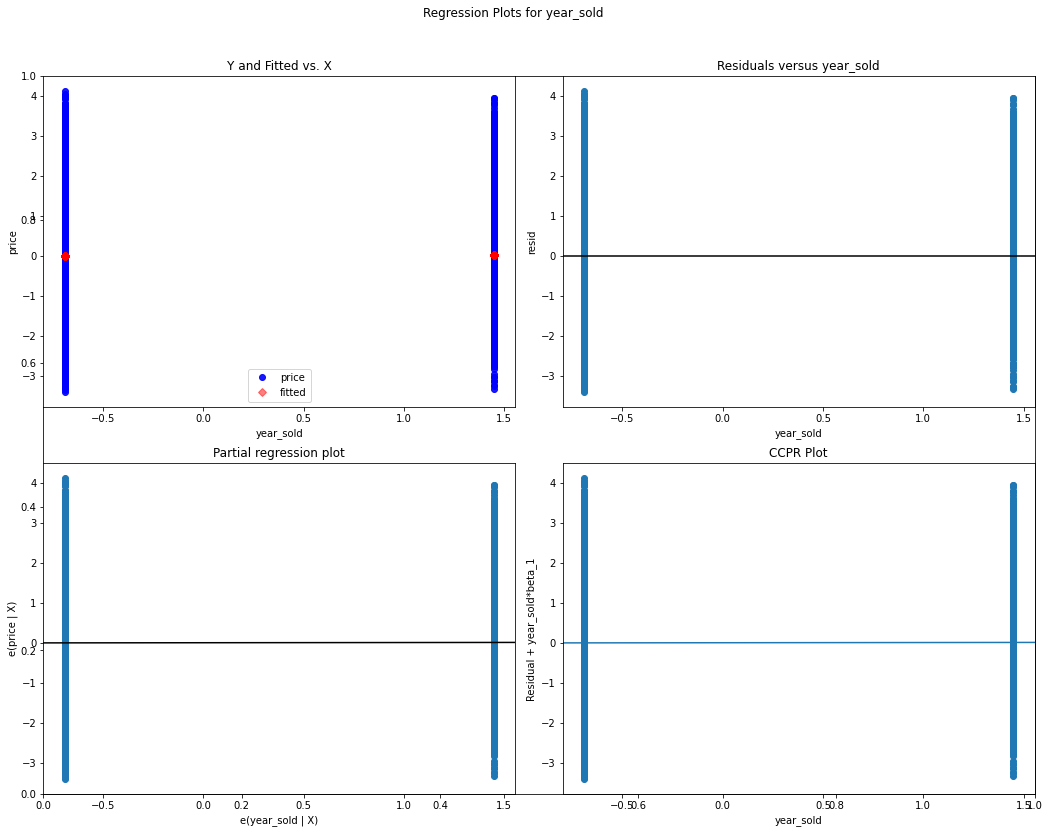

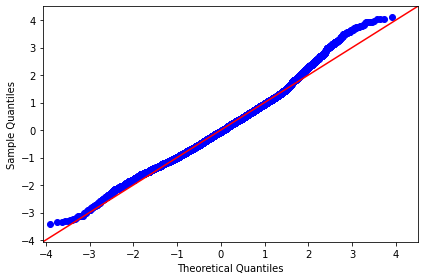

sqft_living * grade normality tests
['sqft_living * grade', 0.5483653439646051, -0.06652622954637039, 0.3623864867115675, 0.0, 71.40508978002528]


ValueError: 'sqft_living * grade' is not in list

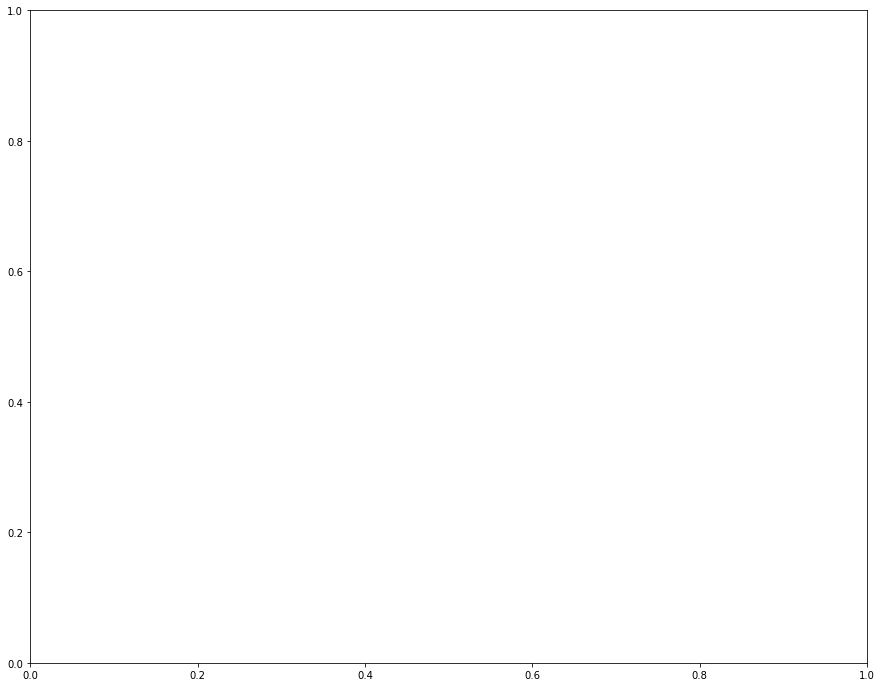

In [48]:
results=[]
for col in fin_con.columns:
    f = f'price~{col}'
    model = smf.ols(formula=f, data=fin_con).fit()
    
    print(f'{col} normality tests')
    result=[col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]]
    results.append(result)
    print(result)
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

In [168]:
df_inter_sm = sm.add_constant(final)
model = sm.OLS(y,final)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.772
Method:                 Least Squares   F-statistic:                              3833.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):                        0.00
Time:                        19:37:58   Log-Likelihood:                         -14655.
No. Observations:               21549   AIC:                                  2.935e+04
Df Residuals:                   21530   BIC:                                  2.950e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
bedrooms               -0.0467      0.004    -10.436      0.000      -0.056      -0.038
bathrooms               0.0742      0.006     12.341      0.000       0.062       0.086
sqft_living             0.1701      0.015     11.055      0.000       0.140       0.200
sqft_lot                0.0237      0.009      2.732      0.006       0.007       0.041
floors                  0.0476      0.005      9.313      0.000       0.038       0.058
waterfront              0.0720      0.003     21.035      0.000       0.065       0.079
view                    0.0883      0.004     23.966      0.000       0.081       0.096
condition               0.0847      0.004     23.477      0.000       0.078       0.092
grade                   0.3458      0.006     59.638      0.000       0.334       0.357
sqft_above              0.1357      0.015      9.005      0.000       0.106       0.165
sqft_basement           0.0698      0.007      9.514      0.000       0.055       0.084
yr_built               -0.1915      0.005    -38.048      0.000      -0.201      -0.182
yr_renovated            0.0290      0.003      8.425      0.000       0.022       0.036
lat                     0.3553      0.003    102.144      0.000       0.348       0.362
long                   -0.0008      0.004     -0.198      0.843      -0.009       0.007
sqft_living15           0.1374      0.006     24.891      0.000       0.127       0.148
sqft_lot15             -0.0695      0.008     -8.220      0.000      -0.086      -0.053
year_sold               0.0453      0.003     13.864      0.000       0.039       0.052
sqft_living * grade     0.0473      0.002     20.987      0.000       0.043       0.052
==============================================================================
Omnibus:                      449.538   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              888.840
Skew:                           0.121   Prob(JB):                    9.79e-194
Kurtosis:                       3.965   Cond. No.                         15.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#zip codes, real r